# Online Retailer Sales Performance Analysis

## Introduction
A leading online retailer sells a wide range of products across categories like Electronics, Clothing, Home Goods, Beauty, and Sports. With a global customer base and thousands of daily transactions, efficient inventory management is crucial for maintaining profitability and customer satisfaction.

## Objective
The business goal of this analysis is to gain insights into product and category performance to inform strategic decisions, including inventory management, marketing campaigns, and product development, ultimately driving increased sales and profitability.

## Data Scope & Timeframe
The analysis will utilize inventory and sales data spanning the period from March 2023 to October 2024. This dataset encompasses comprehensive information on products, suppliers, sales transactions, stock levels, pricing, and other relevant business metrics.

## Data Exploration

### 1. Importing Libraries & Data File

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing data file
df=pd.read_csv('amazavr_inventory.csv')
df.head()

,Unnamed: 0,Product ID,Product Name,Category,Supplier,Month,Unit Price,Stock Quantity,Monthly Sales,Monthly Revenue,Discount %,Reorder Level,Shelf Life (Days),Storage Cost per Unit,Supplier Dependency,Units Defective
0,0,P00071,Kitchen Utensils,Home Goods,GreenLife,01-03-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
1,1,P00071,Kitchen Utensils,Home Goods,GreenLife,01-04-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
2,2,P00071,Kitchen Utensils,Home Goods,GreenLife,01-05-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
3,3,P00071,Kitchen Utensils,Home Goods,GreenLife,01-06-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
4,4,P00071,Kitchen Utensils,Home Goods,GreenLife,01-07-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0


### 2. Data Cleaning

In [ ]:
# Dropping the "Unnamed: 0" column
df = df.drop('Unnamed: 0', axis=1)

# Checking data types, missing values, and inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525120 entries, 0 to 525119
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product ID             525120 non-null  object 
 1   Product Name           525120 non-null  object 
 2   Category               525120 non-null  object 
 3   Supplier               525120 non-null  object 
 4   Month                  525120 non-null  object 
 5   Unit Price             522495 non-null  float64
 6   Stock Quantity         525120 non-null  int64  
 7   Monthly Sales          525120 non-null  int64  
 8   Monthly Revenue        525120 non-null  float64
 9   Discount %             525120 non-null  float64
 10  Reorder Level          525120 non-null  int64  
 11  Shelf Life (Days)      525120 non-null  int64  
 12  Storage Cost per Unit  525120 non-null  float64
 13  Supplier Dependency    525120 non-null  int64  
 14  Units Defective        525120 non-nu

In [ ]:
# Checking for inconsistencies
for column in ['Product Name', 'Category', 'Supplier', 'Month']:
    print(df[column].unique())

['Kitchen Utensils' 'Refrigerator' 'Yoga Mat' 'Laptop' 'Sofa' 'Face Cream'
 'Body Wash' 'T-Shirt' 'Headphones' 'Vacuum Cleaner' 'Dress Shoes'
 'Bluetooth Speaker' 'Tablet' 'Football' 'Washing Machine' 'Smartphone'
 'Sneakers' 'Dumbbells' 'Shampoo' 'Treadmill' 'Microwave' 'Bed Frame'
 'Jacket' 'Jeans' 'Basketball' 'Television' 'Perfume' 'Lipstick'
 'Dining Table' 'Air Conditioner' 'Backpack' 'Foundation' 'Smartwatch'
 'Bookshelf' 'Tennis Racket' 'Office Chair']
['Home Goods' 'Electronics' 'Sports' 'Beauty' 'Clothing']
['GreenLife' 'PlayWell' 'GlobalFit' 'TechWare Inc.' 'ComfortLiving'
 'BeautyWorld' 'FashionPro' 'StitchStyle' 'TechNova' 'MegaTech' 'SportsX'
 'Glamour Supply' 'UrbanThreads' 'HomeEssentials']
['01-03-2023' '01-04-2023' '01-05-2023' '01-06-2023' '01-07-2023'
 '01-08-2023' '01-09-2023' '01-10-2023' '01-11-2023' '01-12-2023'
 '01-01-2024' '01-02-2024' '01-03-2024' '01-04-2024' '01-05-2024'
 '01-06-2024' '01-07-2024' '01-08-2024' '01-09-2024' '01-10-2024']


##### We found the following:
1. No inconsistencies.
2. We need to change the data type of the "Month" column to 'datetime'.
3. The "Unit Price" column has missing values. We will use the "dropna()" method in case that the missing values are less than 5% of the data.

In [ ]:
# Changing data type of the column "Month" to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%d-%m-%Y')


In [ ]:
# Handling missing values
threshold = len(df) * 0.05
cols_to_drop = df.columns[df.isna().sum() <= threshold]
df.dropna(subset=cols_to_drop, inplace = True)

In [ ]:
# Checking for duplicates
df.duplicated().sum()

340

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522155 entries, 0 to 524779
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Product ID             522155 non-null  object        
 1   Product Name           522155 non-null  object        
 2   Category               522155 non-null  object        
 3   Supplier               522155 non-null  object        
 4   Month                  522155 non-null  datetime64[ns]
 5   Unit Price             522155 non-null  float64       
 6   Stock Quantity         522155 non-null  int64         
 7   Monthly Sales          522155 non-null  int64         
 8   Monthly Revenue        522155 non-null  float64       
 9   Discount %             522155 non-null  float64       
 10  Reorder Level          522155 non-null  int64         
 11  Shelf Life (Days)      522155 non-null  int64         
 12  Storage Cost per Unit  522155 non-null  float64  

## Exploratory Data Analysis

In [ ]:
# Counting value occurrences
for col in df.columns:
    print(df[col].value_counts())
    print()

Product ID
P00049    5470
P00115    5413
P00130    5348
P00127    5273
P00119    5169
          ... 
P00066    2611
P00094    2544
P00015    2512
P00085    2509
P00047    2411
Name: count, Length: 143, dtype: int64

Product Name
Dress Shoes          15284
Vacuum Cleaner       15163
Shampoo              15125
Refrigerator         15106
Dumbbells            15094
Bed Frame            14989
Bookshelf            14981
Jacket               14891
Laptop               14876
Headphones           14859
Tablet               14828
Washing Machine      14733
Air Conditioner      14688
Kitchen Utensils     14642
Sneakers             14625
Microwave            14599
Smartphone           14543
Lipstick             14525
Jeans                14503
Football             14495
Dining Table         14492
Perfume              14448
Foundation           14374
Sofa                 14354
Body Wash            14344
Face Cream           14145
Treadmill            14136
Office Chair         14105
Tennis Racket  

In [ ]:
# Computing summary statistics
df.describe()

,Month,Unit Price,Stock Quantity,Monthly Sales,Monthly Revenue,Discount %,Reorder Level,Shelf Life (Days),Storage Cost per Unit,Supplier Dependency,Units Defective
count,522155,522155.000000,522155.000000,522155.000000,522155.000000,522155.000000,522155.000000,522155.000000,522155.000000,522155.000000,522155.000000
mean,2023-12-16 05:59:22.149169920,394.578174,701.626098,760.374421,52030.794036,2.714031,357.442367,382.298996,7.992488,51.528560,53.342452
min,2023-03-01 00:00:00,5.010000,10.000000,10.000000,148.830000,0.000000,10.000000,30.000000,1.000000,0.000000,0.000000
25%,2023-07-01 00:00:00,43.460000,31.000000,30.000000,8340.780000,0.000000,17.000000,208.000000,3.010000,30.000000,0.000000
50%,2023-12-01 00:00:00,136.120000,60.000000,50.000000,21553.200000,0.000000,36.000000,384.000000,10.040000,50.000000,3.000000
75%,2024-06-01 00:00:00,467.170000,350.000000,500.000000,53788.350000,2.210000,174.000000,558.000000,12.510000,70.000000,61.000000
max,2024-10-01 00:00:00,2999.050000,3890.000000,4000.000000,797440.000000,100.000000,3874.000000,730.000000,2960.650000,100.000000,398.000000
std,NaN,572.209929,1301.086030,1329.856820,94129.822010,5.873054,781.154736,202.155042,16.743054,25.237963,91.369927


### 1. Visualizing Numerical Columns & Outliers

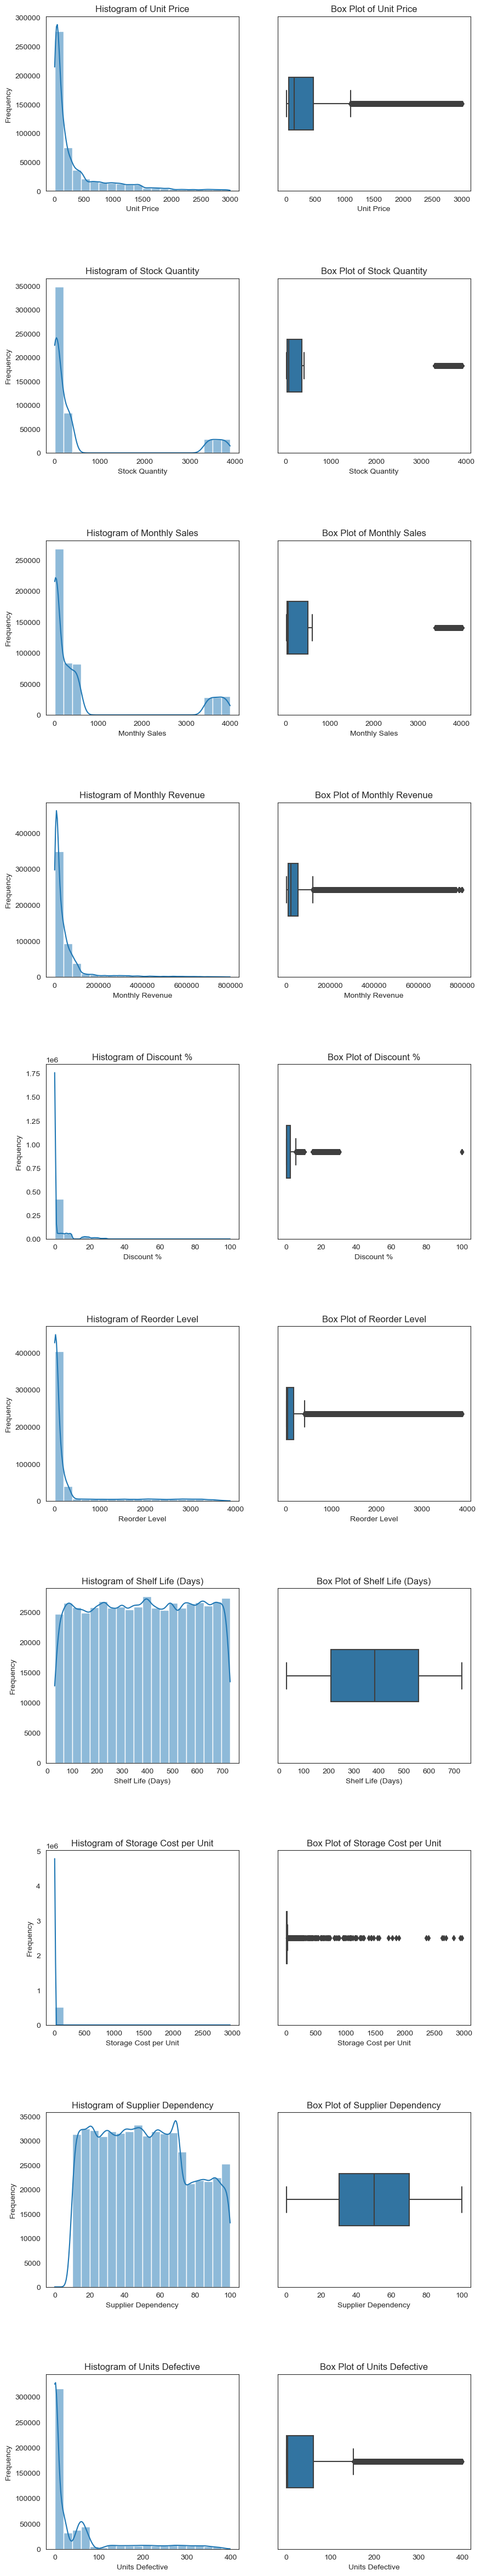

In [ ]:
# Selecting numerical columns for analysis
numerical_columns = ['Unit Price', 'Stock Quantity', 'Monthly Sales', 'Monthly Revenue', 'Discount %', 'Reorder Level',
                     'Shelf Life (Days)', 'Storage Cost per Unit', 'Supplier Dependency',
                     'Units Defective']

# Calculating the number of rows for the subplots
num_plots = len(numerical_columns)

# Creating subplots with histograms and box plots
fig, axes = plt.subplots(num_plots, 2, figsize=(10, 6 * num_plots))
fig.subplots_adjust(hspace=0.5)


for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(data=df, x=column, ax=axes[i, 0], bins=20, kde=True)
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(data=df, x=column, ax=axes[i, 1], width=0.3)
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('')

plt.show()

- The analysis identified a potential concern in the 'Discount %' column, specifically instances where products were sold at a 100% discount. These outliers require further investigation to understand the underlying reasons.

In [ ]:
# Identify products with 100% discount
products_with_100_discount = df[df['Discount %'] == 100]

print(products_with_100_discount)

       Product ID     Product Name     Category   Supplier      Month  \
28528      P00134   Vacuum Cleaner   Home Goods  GreenLife 2023-11-01   
132431     P00124  Air Conditioner  Electronics   TechNova 2024-02-01   
172683     P00129        Microwave  Electronics   PlayWell 2023-06-01   
435430     P00058        Bookshelf   Home Goods  GreenLife 2024-01-01   

        Unit Price  Stock Quantity  Monthly Sales  Monthly Revenue  \
28528       137.41              31             22          3023.02   
132431      901.95              21             20         18039.00   
172683      120.39              22             46          5537.94   
435430      171.75              30             13          2232.75   

        Discount %  Reorder Level  Shelf Life (Days)  Storage Cost per Unit  \
28528        100.0             28                640                  10.12   
132431       100.0             19                511                  14.31   
172683       100.0             13             

- The investigation revealed four products sold with a 100% discount.
- Although inventory levels (stock quantity and reorder level) for these products seemed normal, the presence of defective units specifically for two of them indicated a possible cause for that discount.
- Since defective units are generally returned to the supplier rather than distributed for free, we adjusted the analysis by replacing the 100% discount values with the second-highest discount applied to each of the affected products.

In [ ]:
# Function to find the next highest discount for a product
def find_next_highest_discount(product_name, df):
    product_df = df[df['Product Name'] == product_name]
    return product_df[product_df['Discount %'] < 100]['Discount %'].max()

# Replace 100% discounts with the next highest value
for index, row in products_with_100_discount.iterrows():
    next_highest_discount = find_next_highest_discount(row['Product Name'], df)
    df.loc[index, 'Discount %'] = next_highest_discount

### 2. Visualizing Categorical Columns

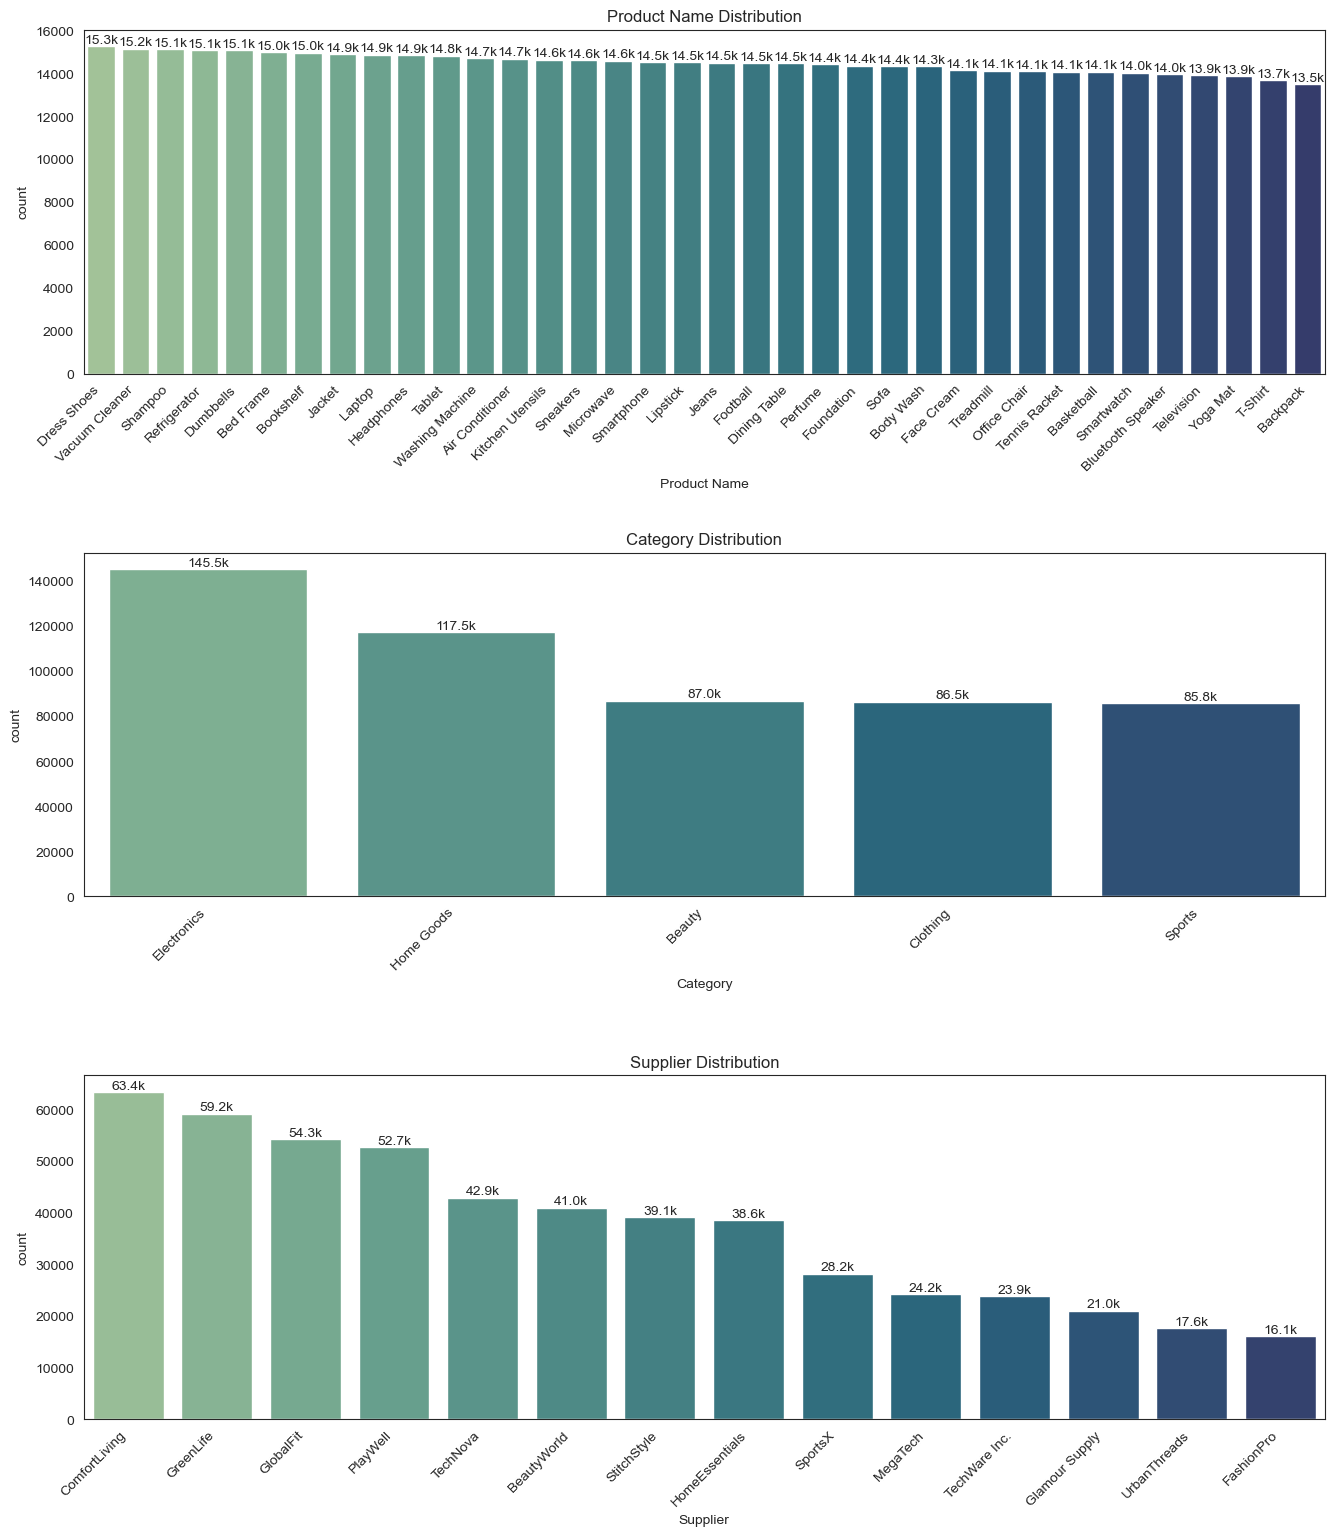

In [ ]:
def plot_distributions(df):
    """
    Plots the distribution of products, categories, and suppliers with counts in thousands.

    Args:
        df: The DataFrame containing the data.

    Returns:
        None
    """

    sns.set_style("white")
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 16))

    for i, column in enumerate(["Product Name", "Category", "Supplier"]):
        counts = df[column].value_counts().sort_values(ascending=False)
        sns.countplot(x=column, data=df, ax=axes[i], palette='crest', order=counts.index)
        axes[i].set_title(f"{column} Distribution")
        axes[i].set_xlabel(column)

        # Rotating x-axis labels for better readability
        axes[i].set_xticklabels(counts.index, rotation=45, ha="right")

        # Annotating counts in thousands with 2 decimals
        for p in axes[i].patches:
            count = p.get_height()
            axes[i].annotate(f"{count / 1000:.1f}k",
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom')

    plt.tight_layout(pad=3)
    plt.show()

plot_distributions(df)

#### Product Distribution
- The products distribution is relatively uniform across most products, with counts generally ranging from 13,500 to 15,300. There are slight variations, which could mean that some products are more or less popular than others. However, this could be due to product(s) popularity, seasonality, and/or discounts. Additionally, there is no indication of a single product dominating the sales significantly.

#### Category Distribution
- "Electronics" is the most dominant category, with a count significantly higher than any other category, around 145.5k. "Home Goods" comes second with around 117.5k. "Beauty", "Clothing", and "Sports" have relatively similar counts, ranging from roughly 85k to 87k.
- The higher counts for "Electronics" and "Home Goods" could indicate a potential focus on these categories, in terms of sales, marketing, product offerings, and/or customer demand. However, this needs to be further investigated via Sales and Revenue analyses by category, and identifying trends over time.

#### Supplier Distribution
Supplier analysis is out of this analysis scope.

## Sales Performance Analysis

### 1. Product Analysis

#### 1.1 Total Sales (Number of Units sold) by Product

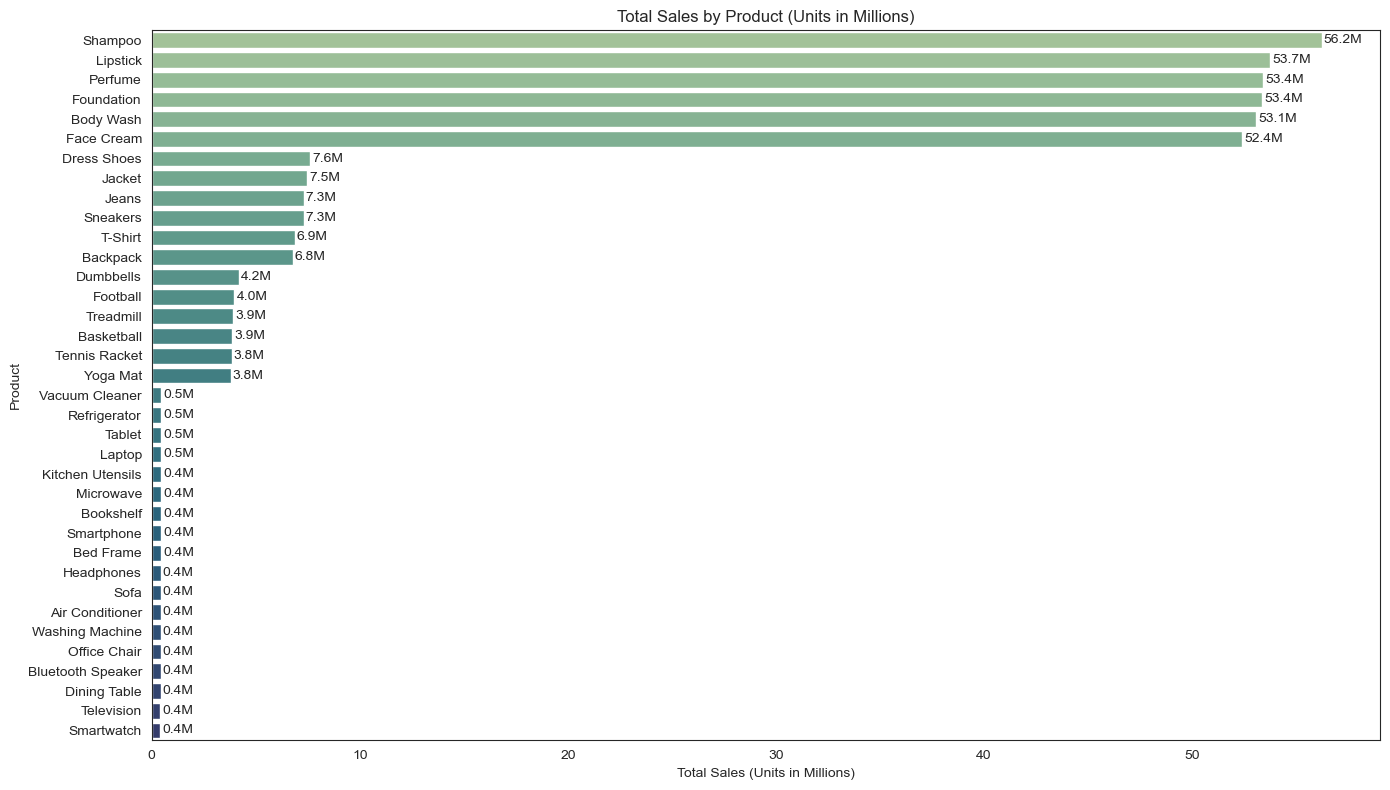

In [ ]:
# Calculating sales by by product
products_sales = df.groupby('Product Name')['Monthly Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=products_sales.values / 1e6, y=products_sales.index, palette='crest')

plt.title('Total Sales by Product (Units in Millions)')
plt.xlabel('Total Sales (Units in Millions)')
plt.ylabel('Product')
for index, value in enumerate(products_sales.values / 1e6):
    plt.text(value + 0.1, index, f'{value:.1f}M', va='center')

plt.tight_layout()
#plt.savefig('total_sales_by_product.png')
plt.show()

- "Beauty" products like "Shampoo," "Lipstick," "Perfume," "Foundation," and "Body Wash" are the top sellers, each with sales exceeding 50 million units, indicating a strong demand for this category.
- Products like "Dress Shoes," "Jacket," "Jeans," and "Sneakers" fall in the mid-range, with sales between 6.8 and 7.6 million units. These are likely popular "Clothing" items.
- Products like "Dumbbells," "Football," and other "Sports" products, along with "Home Goods" and "Electronics, have lower sales figures, mostly below 5 million units.


The high sales of the "Beauty" products could indicate a focus on this category, in terms of marketing, product variety, and/or customer demand. It could be also related to the relatively lower prices of such products or their nature as essential everyday-products.

#### 1.2 Total Revenue by Product

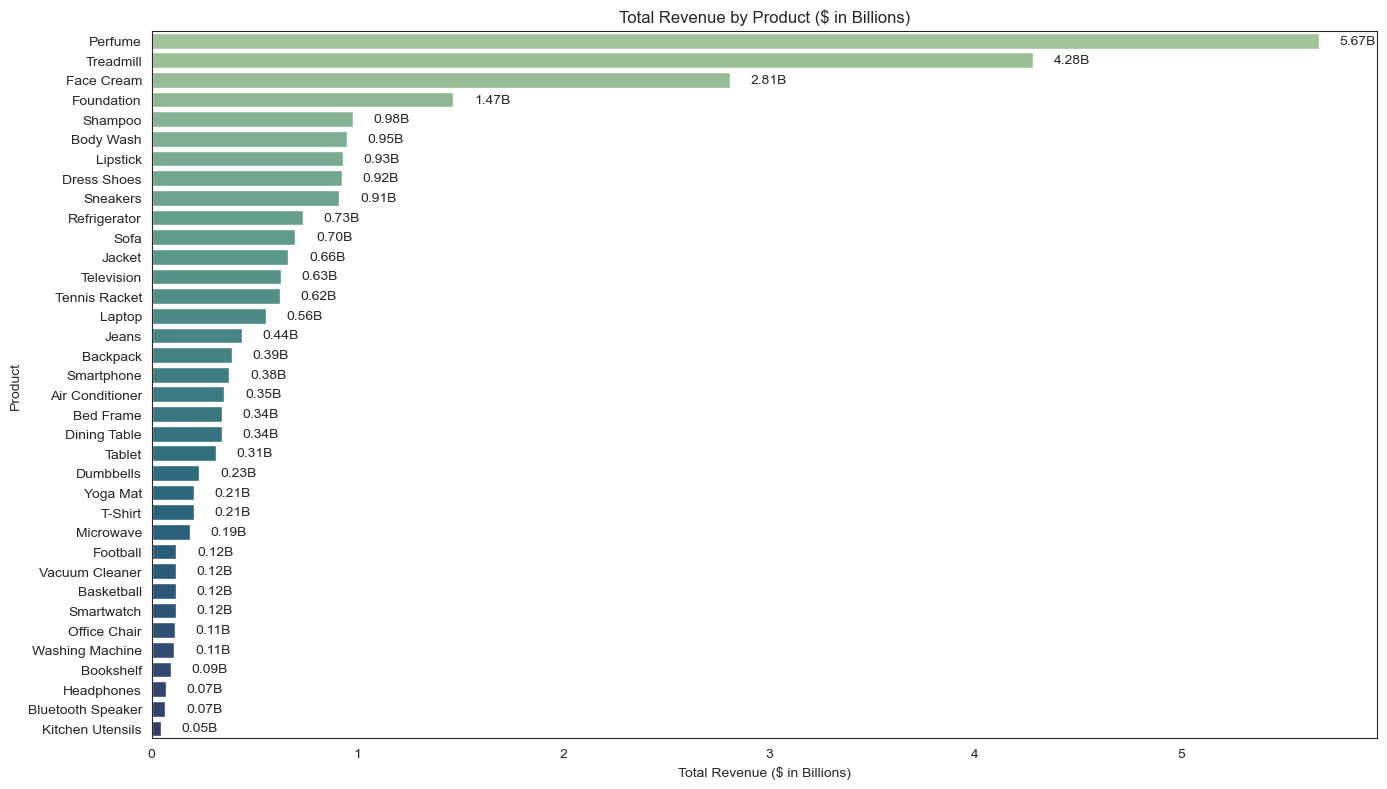

In [ ]:
# Calculating total revenue by product
products_revenue = df.groupby('Product Name')['Monthly Revenue'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=products_revenue.values / 1e9, y=products_revenue.index, palette='crest')

plt.title('Total Revenue by Product ($ in Billions)')
plt.xlabel('Total Revenue ($ in Billions)')
plt.ylabel('Product')
for index, value in enumerate(products_revenue.values / 1e9):
    plt.text(value + 0.1, index, f'{value:.2f}B', va='center')

plt.tight_layout()
#plt.savefig('total_revenue_by_product.png')
plt.show()

- "Perfume" and "Treadmill" stand out as the highest revenue generators, with "Perfume" bringing in over 5.5 billion dollars and "Treadmill" close behind at over 4 billion.
- "Beauty" products, like "Face Cream," "Foundation," "Shampoo," "Body Wash," and "Lipstick," also contribute significantly to revenue, each generating close to or over 1 billion dollars.
- "Clothing" products like "Dress Shoes," "Sneakers," and "Jacket" fall in the mid-range of revenue generation.
"Home Goods" and "Electronics" products, like "Refrigerator," "Sofa," "Television," and "Laptop" also contribute a moderate amount to the overall revenue.
- Even though "Treadmill" generated the second highest revenue, other "Sports" products like "Tennis Racket," "Dumbbells," and "Yoga Mat" generated lower revenue compared to other categories.


Given that we calculated the total revenue before applying any discounts, it's important to assess how significantly the total revenue per product would be impacted if we were to factor in the applied discounts.

#### 1.3 Total Revenue by Product after Discount

In [ ]:
# Calculating the discounted unit price
df['Discounted Price'] = df['Unit Price'] * (1- df['Discount %'] / 100)

# Calculating revenue after discount
df['Monthly Revenue after Discount'] = df['Discounted Price'] * df['Monthly Sales']

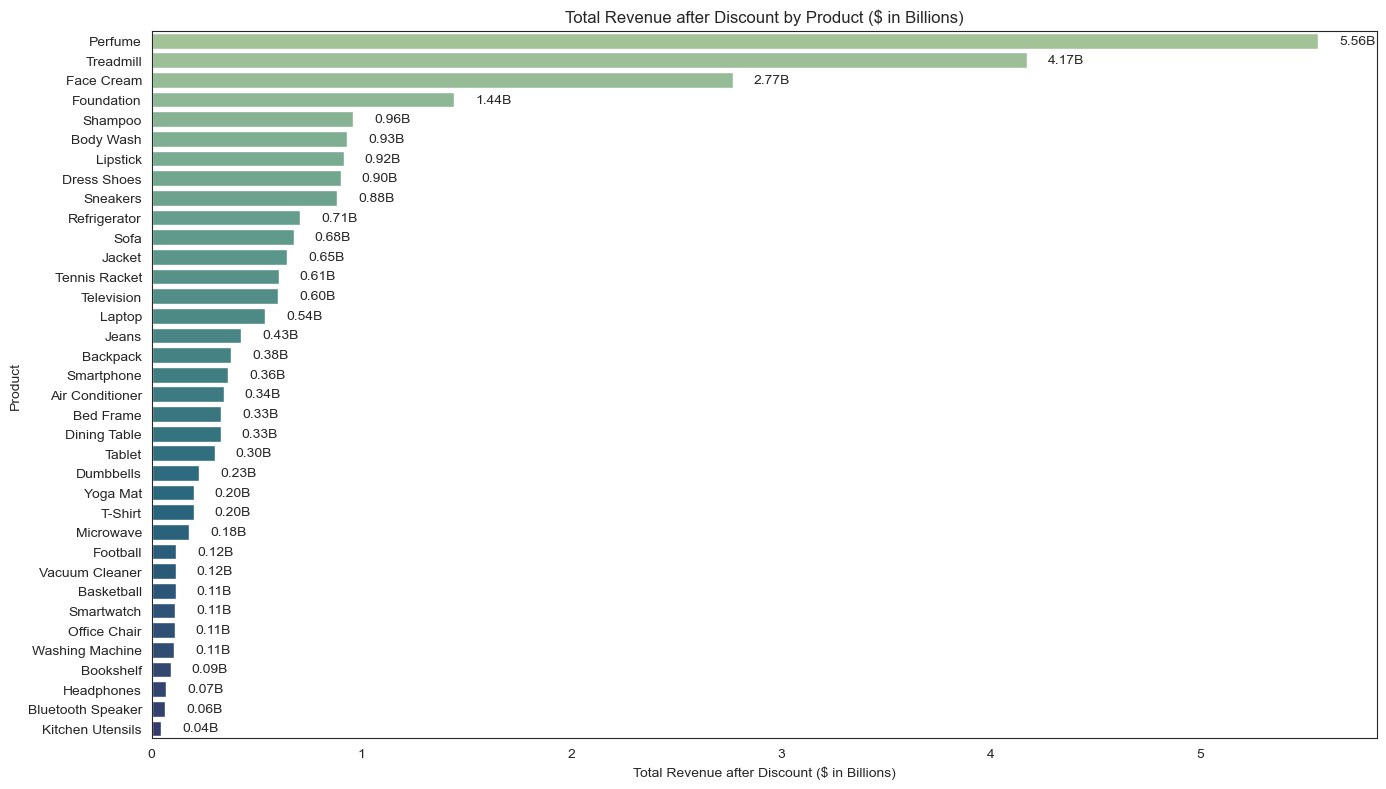

In [ ]:
# Calculating total revenue by product after discount
products_revenue_after_discount = df.groupby('Product Name')['Monthly Revenue after Discount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=products_revenue_after_discount.values / 1e9, y=products_revenue_after_discount.index, palette='crest')

plt.title('Total Revenue after Discount by Product ($ in Billions)')
plt.xlabel('Total Revenue after Discount ($ in Billions)')
plt.ylabel('Product')
for index, value in enumerate(products_revenue_after_discount.values / 1e9):
    plt.text(value + 0.1, index, f'{value:.2f}B', va='center')

plt.tight_layout()
plt.show()

#### 1.4 Difference between Total Revenue and Total Revenue after Discount by Product

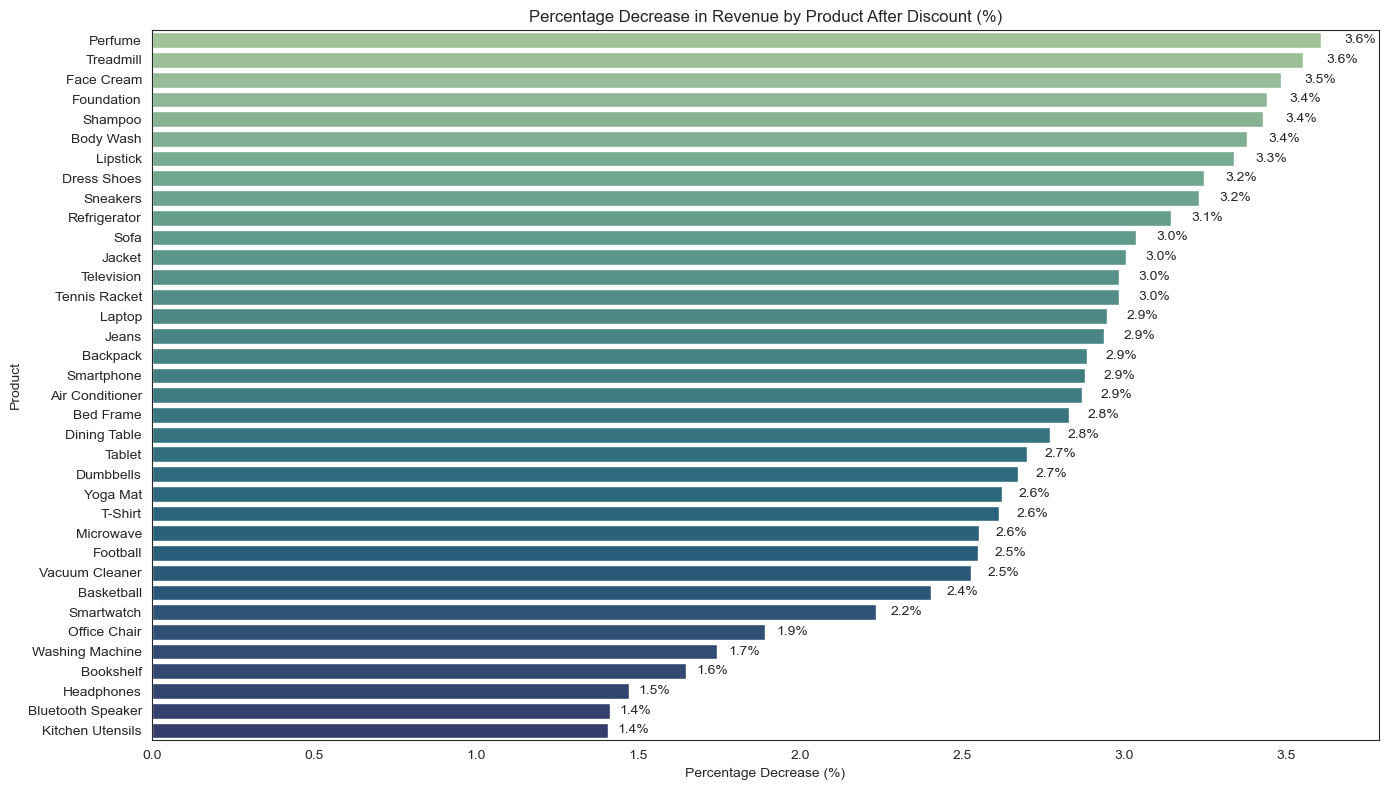

In [ ]:
# Calculating revenue difference as percentage
product_revenue_difference = ((products_revenue - products_revenue_after_discount) / products_revenue * 100).sort_values(ascending=False)

# Combining data into a single DataFrame
product_revenue_data = pd.DataFrame({'Product Name': products_revenue.index, 'Percentage Decrease': product_revenue_difference})

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage Decrease', y='Product Name', data=product_revenue_data, palette='crest', orient='h')

for i, (product, value) in enumerate(product_revenue_data['Percentage Decrease'].items()):
    plt.text(value + (value * 0.02), i, f'{value:.1f}%', ha='left', va='center')

plt.xlabel('Percentage Decrease (%)')
plt.ylabel('Product')
plt.title('Percentage Decrease in Revenue by Product After Discount (%)')
plt.tight_layout()
#plt.savefig('product_revenue_perc_decrease_.png')
plt.show()

- The majority of products experienced a relatively small revenue decrease (between 1.4% and 3.6%) after the discount was applied, indicating that the discount had a limited impact on revenue. This could be due to price elasticity, the discount offered was not that significant to boost the sales.
- To gain a more comprehensive understanding, it would be beneficial to examine sales data both before and after the discount implementation, as well as conduct a detailed price sensitivity analysis for each individual product.

Correlation between Discount % and Monthly Sales: -0.09
Correlation between Discount % and Monthly Revenue: -0.04
Correlation between Discount % and Monthly Revenue after Discount: -0.06


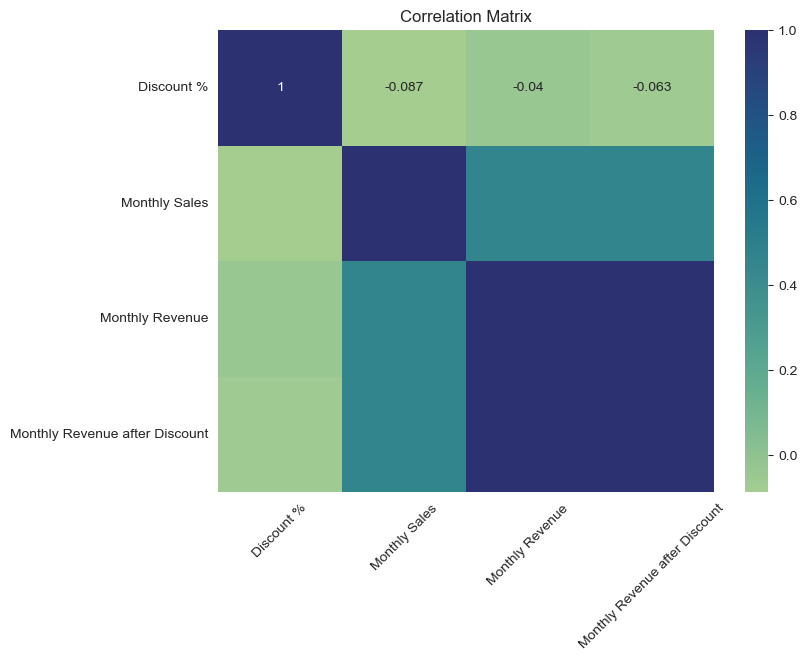

In [ ]:
# Calculating the correlation coefficient
correlation_sales = df['Discount %'].corr(df['Monthly Sales'])
correlation_revenue = df['Discount %'].corr(df['Monthly Revenue'])
correlation_revenue_after_discount = df['Discount %'].corr(df['Monthly Revenue after Discount'])

print(f"Correlation between Discount % and Monthly Sales: {correlation_sales:.2f}")
print(f"Correlation between Discount % and Monthly Revenue: {correlation_revenue:.2f}")
print(f"Correlation between Discount % and Monthly Revenue after Discount: {correlation_revenue_after_discount:.2f}")

# Calculating the correlation matrix
correlation_matrix = df[['Discount %', 'Monthly Sales', 'Monthly Revenue', 'Monthly Revenue after Discount']].corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
#plt.savefig('corr_matrix.png')
plt.show()

- Most of the correlation coefficients are relatively close to zero, indicating weak linear relationships between the variables. This assumes that there is no direct, strong relationship between variables.
- There is a slight negative correlation (-0.09) between Discount % and Monthly Sales. This could indicate that higher discounts do not necessarily lead to a significant increase in sales volume, or that other factors are influencing sales more strongly.
- A slight negative correlation (-0.06) between Discount % and Monthly Revenue, indicating that discount % does not have a significant impact on the revenue.
- A moderate positive correlation (0.6) is observed between Monthly Sales and Monthly Revenue. This is logical, as higher sales volumes generally lead to increased revenue.

Further analysis of the impact of discount would be needed given these weak correlations. There could be other factors along with the discount %, such as seasonality, consumer behavior, and marketing campaigns.

### 2. Category Analysis

#### 2.1 Number of Products per Category

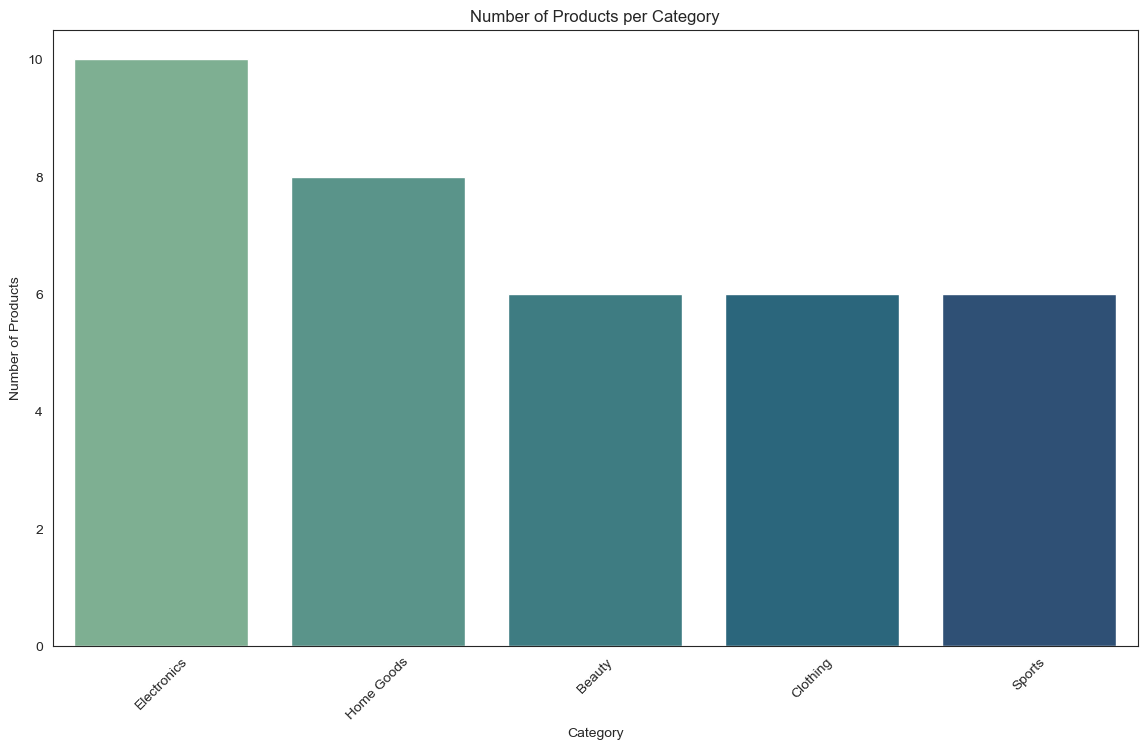

In [ ]:
# Calculating the number of unique products per each category
product_count_by_category = df.groupby('Category')['Product Name'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=product_count_by_category.index, y=product_count_by_category.values, palette='crest')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Number of Products per Category')
plt.xticks(rotation=45)
plt.show()

#### 2.2 Total Sales (Number of Units sold) by Category

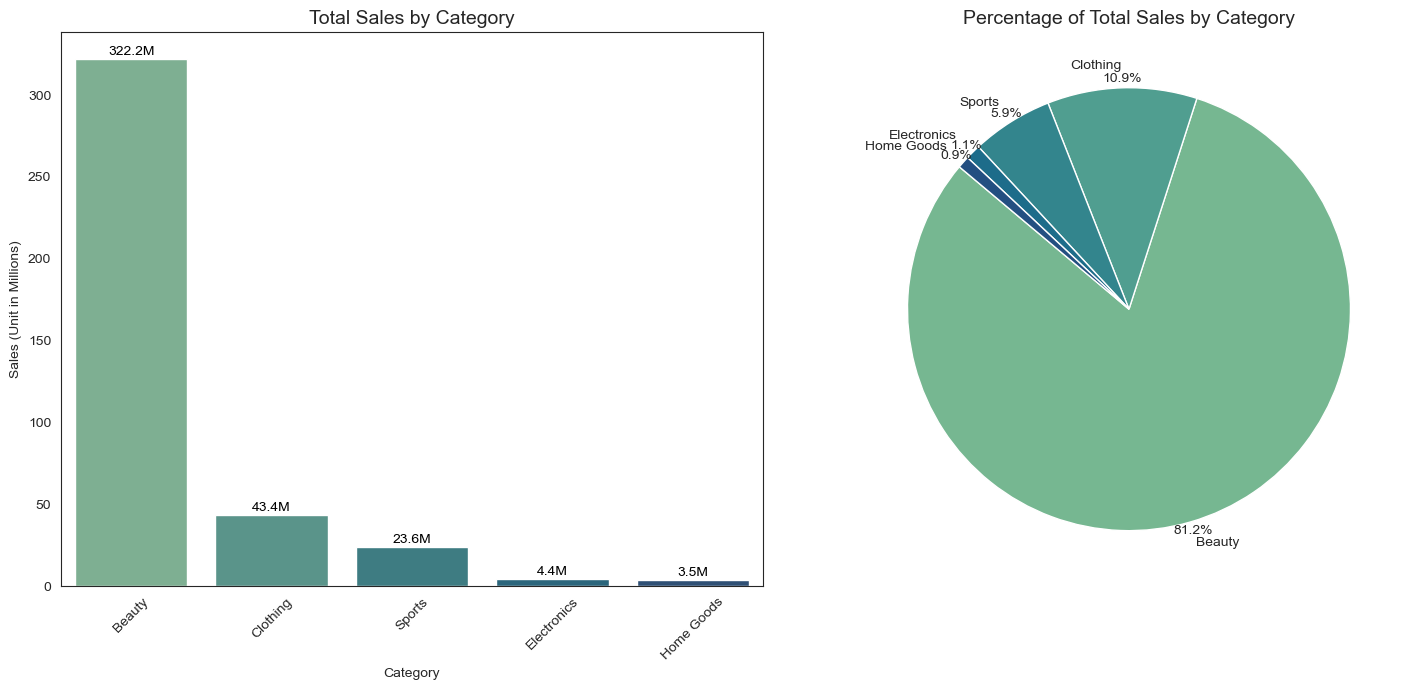

In [ ]:
# Calculating total sales by category
category_sales = df.groupby('Category')['Monthly Sales'].sum().sort_values(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart for category sales
sns.barplot(x=category_sales.index, y=category_sales.values / 1e6, ax=axes[0], palette='crest')
axes[0].set_ylabel("Sales (Unit in Millions)")
axes[0].set_title('Total Sales by Category', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Adding annotations to the bar chart
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Pie chart for percentage contribution with 'crest' palette
axes[1].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%',
            colors=sns.color_palette('crest', len(category_sales)),
            startangle=140, textprops={'fontsize': 10}, pctdistance=1.04)
axes[1].set_title('Percentage of Total Sales by Category', fontsize=14)

plt.tight_layout()
plt.show()

- The "Beauty" category has the highest sales, both in terms of total sales value and percentage of total sales. This is significantly higher than other categories, considering that "Clothing", the second highest, makes up only to around 11%.
- The remaining categories (Sports, Electronics, and Home Goods) have low sales compared to Beauty, suggesting a need for further analysis to understand the performance of these categories.

#### 2.3 Total Revenue by Category

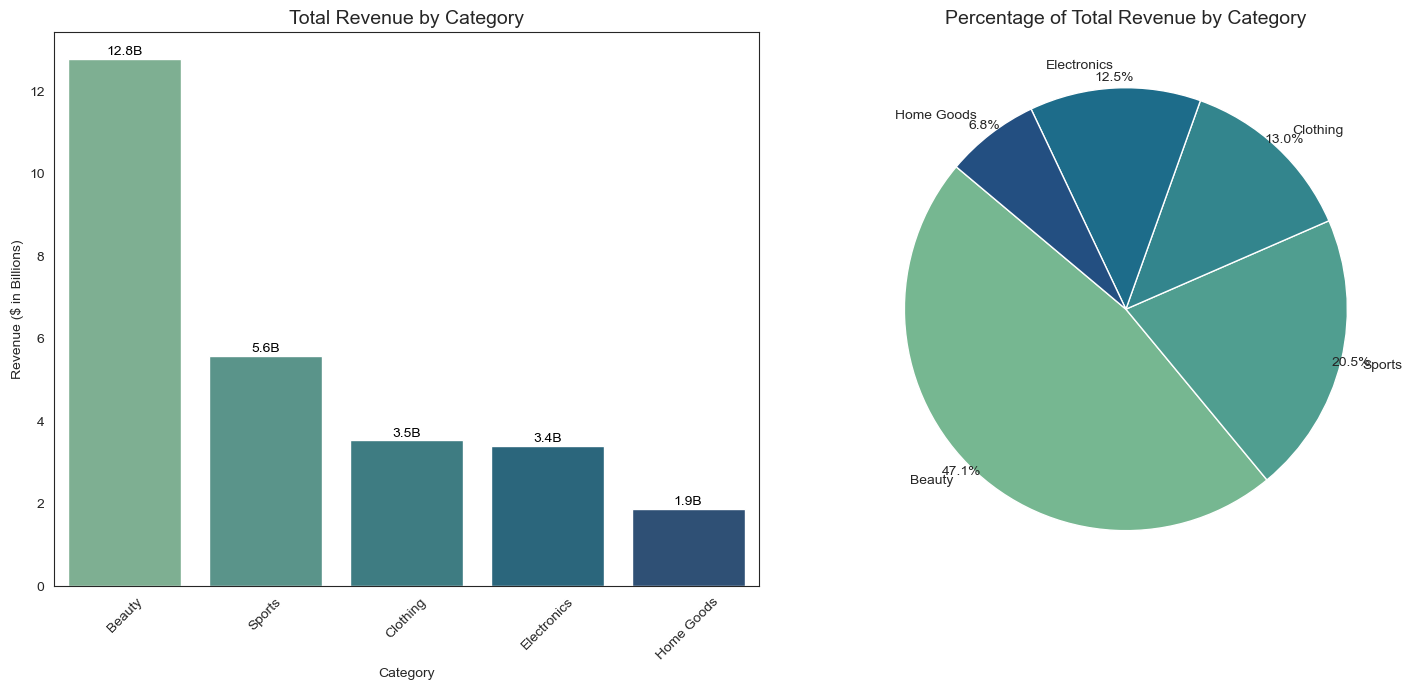

In [ ]:
# Calculating total revenue by category
category_revenue = df.groupby('Category')['Monthly Revenue'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart for category revenue
sns.barplot(x=category_revenue.index, y=category_revenue.values / 1e9, ax=axes[0], palette='crest')
axes[0].set_ylabel("Revenue ($ in Billions)")
axes[0].set_title('Total Revenue by Category', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Adding annotations to the bar chart
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}B', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Pie chart for percentage contribution with 'crest' palette
axes[1].pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%',
            colors=sns.color_palette('crest', len(category_revenue)),
            startangle=140, textprops={'fontsize': 10}, pctdistance=1.045)
axes[1].set_title('Percentage of Total Revenue by Category', fontsize=14)

plt.tight_layout()
plt.show()

- Similar to sales, "Beauty" dominates revenue generation. This reinforces the idea that "Beauty" is a core strength and likely a major driver of profitability.
- While "Sports" came third in total sales, it generates the second highest revenue. This suggests a higher average selling price or potentially higher profit margins on sports products compared to other categories like Clothing.
- "Clothing" had the second highest sales volume, but its revenue falls to third place. This could indicate lower prices or possibly higher costs associated with this category, leading to lower overall revenue compared to Sports.

Further investigation will be conducted, also for the other two categories (Electronics and Home Goods). However, let's analyse the impact of discount on the total revenue for each category.

#### 2.4 Total Revenue after Discount by Category

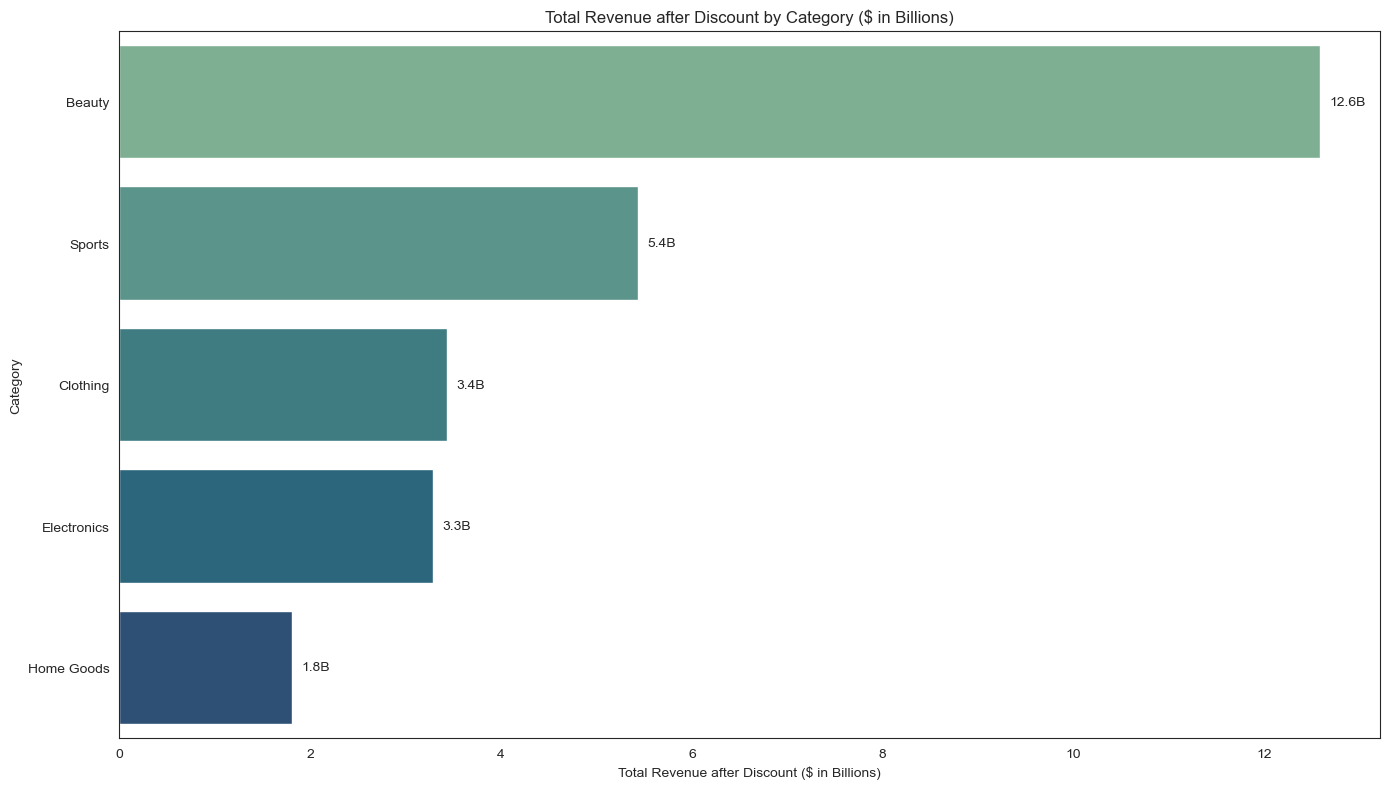

In [ ]:
# Calculating total revenue by category after discount
category_revenue_after_discount = df.groupby('Category')['Monthly Revenue after Discount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=category_revenue_after_discount.values / 1e9, y=category_revenue_after_discount.index, palette='crest')

plt.title('Total Revenue after Discount by Category ($ in Billions)')
plt.xlabel('Total Revenue after Discount ($ in Billions)')
plt.ylabel('Category')
for index, value in enumerate(category_revenue_after_discount.values / 1e9):
    plt.text(value + 0.1, index, f'{value:.1f}B', va='center')

plt.tight_layout()
#plt.savefig('revenue_discounted_category.png')
plt.show()

#### 2.5 Percentage Difference Between Total Revenue Before and After Discount

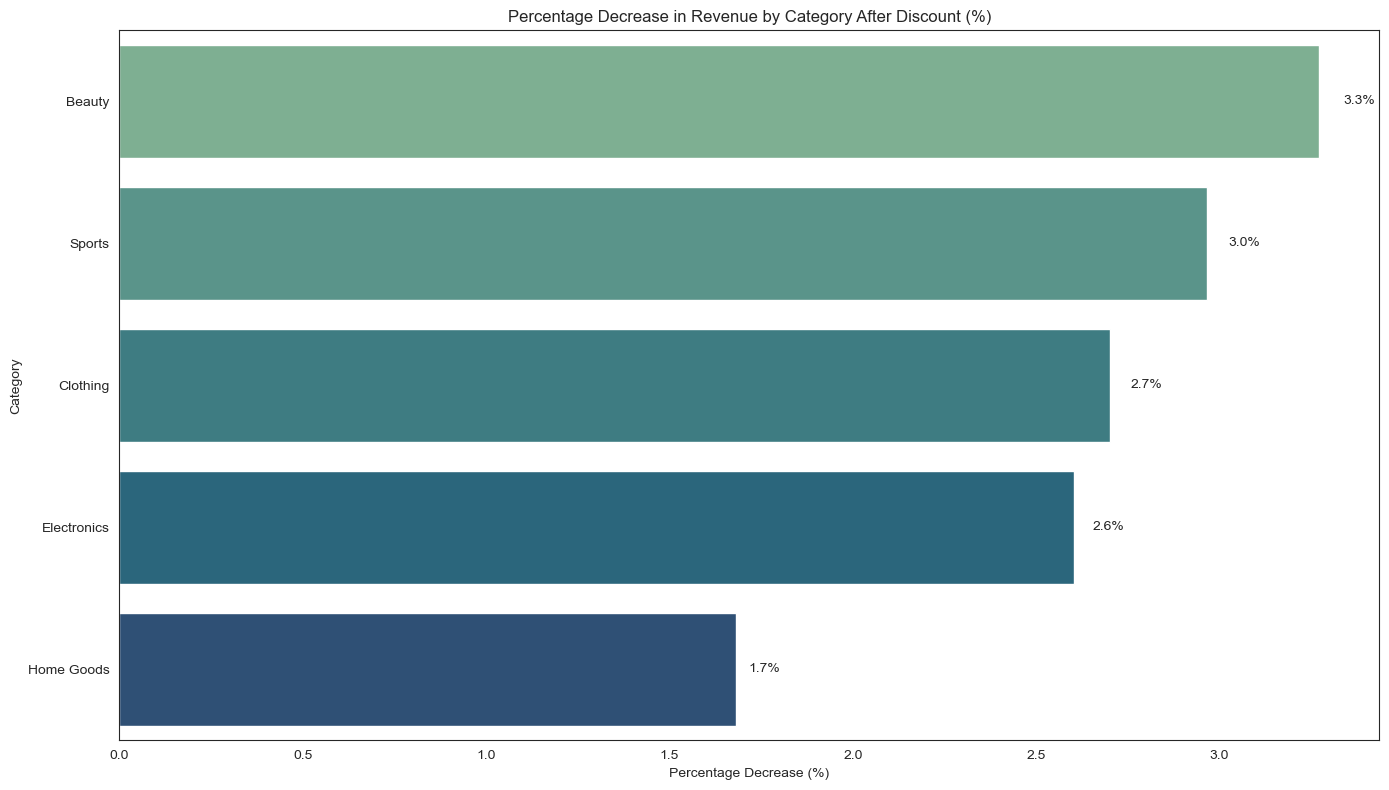

In [ ]:
category_revenue_difference = ((category_revenue - category_revenue_after_discount) / category_revenue * 100).sort_values(ascending=False)

# Combining data into a single DataFrame
category_revenue_data = pd.DataFrame({'Category': category_revenue.index, 'Percentage Decrease': category_revenue_difference})


# Creating the horizontal bar chart with seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage Decrease', y='Category', data=category_revenue_data, palette='crest')

# Adding annotations using the data directly
for i, (category, value) in enumerate(category_revenue_data['Percentage Decrease'].items()):
    plt.text(value + (value * 0.02), i, f'{value:.1f}%', ha='left', va='center')

plt.xlabel('Percentage Decrease (%)')
plt.ylabel('Category')
plt.title('Percentage Decrease in Revenue by Category After Discount (%)')
plt.tight_layout()
#plt.savefig('category_revenue_decrease.png')
plt.show()

- "Beauty" experienced the highest percentage decrease in revenue (3.3%) after the discount.
- "Sports" and "Clothing" followed closely with a decrease of 3.0% and 2.7%, respectively.
- "Electronics" and "Home Goods" showed the least impact from the discount, with decreases of 2.6% and 1.7%, respectively.

The discount might have been more effective in attracting price-sensitive customers in the Beauty, Sports, and Clothing categories, leading to higher revenue loss. Alternatively, the discount may have had a smaller impact on Electronics and Home Goods, possibly due to their perceived higher value or less price-elastic demand.

Further Considerations:

It would be helpful to know the specific discount percentage applied to each category to understand the impact per unit of discount.
Analyzing the profit margins for each category before and after the discount would provide a more comprehensive picture of the financial impact.

#### 2.6 Average Discount % by Category

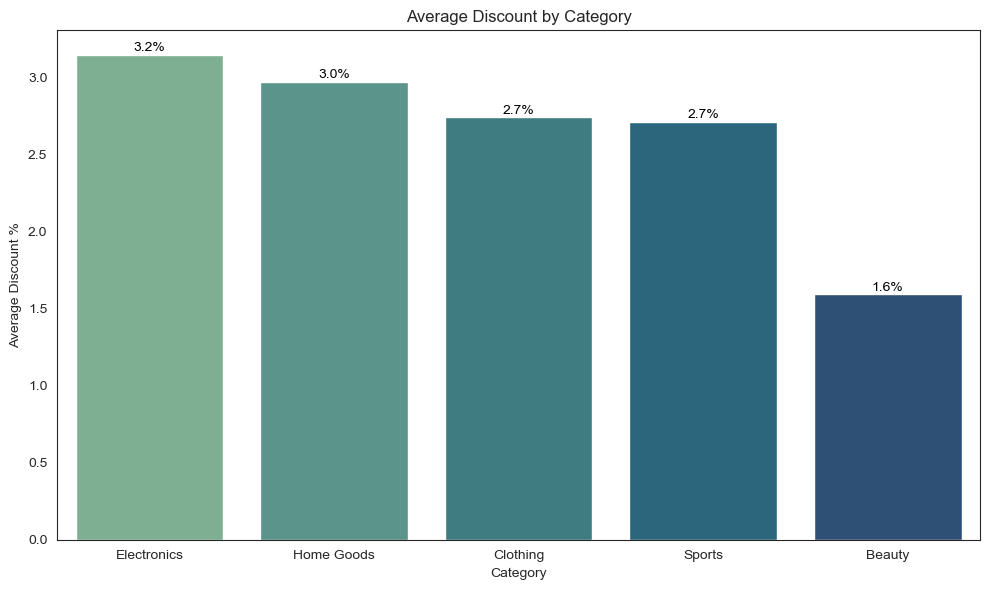

In [ ]:
avg_discount = df.groupby('Category')['Discount %'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_discount.index, y=avg_discount.values, palette='crest')
plt.xlabel("Category")
plt.ylabel("Average Discount %")
plt.title("Average Discount by Category")

# Adding annotations
for i, v in enumerate(avg_discount.values):
    ax.annotate(f'{v:.1f}%', (i, v), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

- "Electronics" and "Sports" show a much smaller decrease in revenue after discounts. This suggests that these categories are actually less sensitive to discounts than initially thought. Customers may be less focused on price and more on factors like brand, features, or specific product needs.
- "Beauty" emerges as the most sensitive category to discounts, with a 3.3% decrease in revenue. This highlights the importance of carefully managing discounts in this category, potentially by offering smaller, more targeted discounts or exploring alternative promotional strategies.
- "Home Goods" shows the lowest sensitivity to discounts. This reinforces the idea that the current discounting strategy for this category is likely effective.

#### 2.7 Comparing the Category Contribution to the Total Sales and Total Revenue After Discount

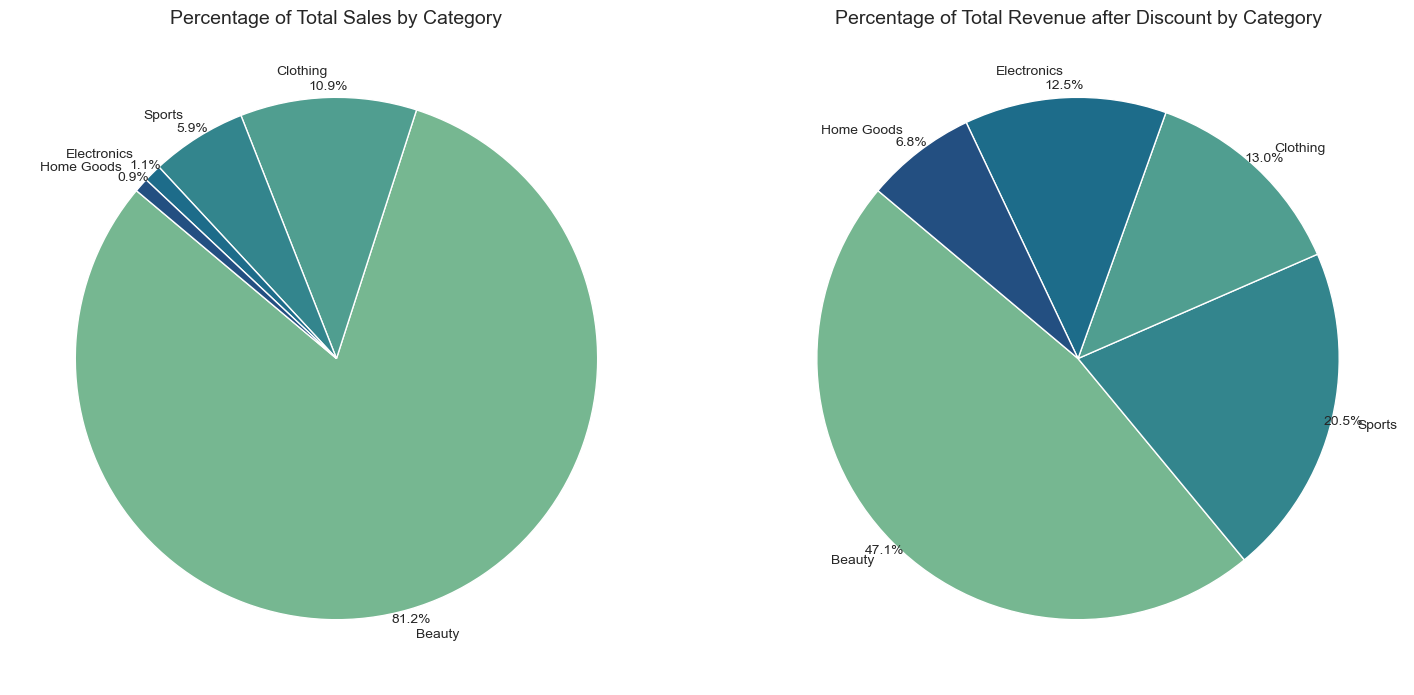

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Getting a list of unique categories
categories = category_sales.index

# Creating a dictionary to map categories to colors
category_colors = {category: color for category, color in zip(categories, sns.color_palette('crest', len(categories)))}

# Pie chart for total sales with consistent colors
axes[0].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%',
            colors=[category_colors[category] for category in category_sales.index],
            startangle=140, textprops={'fontsize': 10}, pctdistance=1.04)
axes[0].set_title('Percentage of Total Sales by Category', fontsize=14)

# Pie chart for total revenue with consistent colors
axes[1].pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%',
            colors=[category_colors[category] for category in category_revenue.index],
            startangle=140, textprops={'fontsize': 10}, pctdistance=1.045)
axes[1].set_title('Percentage of Total Revenue after Discount by Category', fontsize=14)

plt.tight_layout()
plt.savefig('sales_revenue_perc_category.png')
plt.show()


- While "Beauty" leads in sales, "Electronics" and "Home Goods" contribute the most to revenue, as they generate relatively higher revenue despite lower sales volumes. This indicates that these categories have higher average unit prices compared to the top-selling category.
- On the other hand, "Clothing" and "Sports" have high sales volumes but generate relatively low revenue, indicating that they might have lower average unit prices.
- Although we do not have data on product cost to calculate profit margins and make more precise assessments of category profitability, we still can conduct a 'Unit Price Analysis' to calculate the revenue per unit sold for each category.

#### 2.8 Revenue per Unit Sold

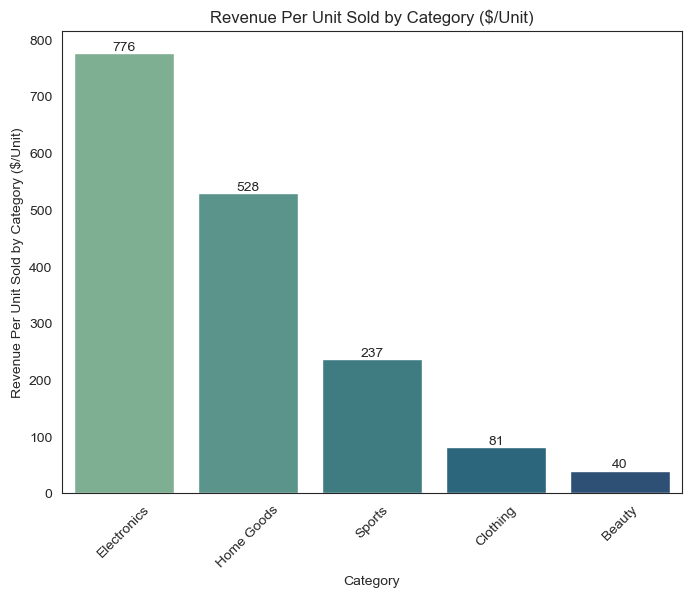

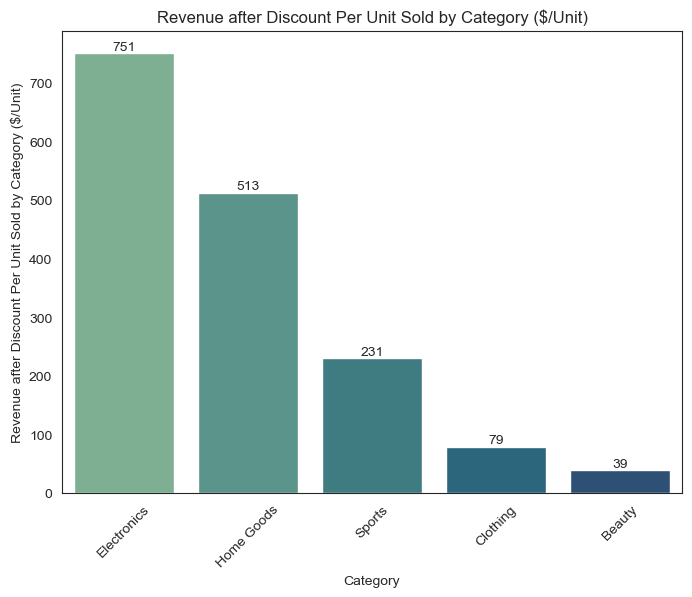

In [ ]:
def plot_revenue_per_unit(revenue_data, title):
  """
  Generates a bar chart visualizing revenue per unit sold by category.

  Args:
    revenue_data: pandas Series with revenue per unit for each category.
    title: str, the title of the chart.
  """

  plt.figure(figsize=(8, 6))
  sns.barplot(x=revenue_data.index, y=revenue_data.values, palette="crest")
  plt.xlabel('Category')
  plt.ylabel(title)
  plt.title(title)
  plt.xticks(rotation=45)

  for i, v in enumerate(revenue_data.values):
      plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')
  plt.show()

# Calculating revenue per unit
revenue_per_unit = (category_revenue / category_sales).sort_values(ascending=False)
revenue_per_unit_discount = (category_revenue_after_discount / category_sales).sort_values(ascending=False)

# Plotting the charts
plot_revenue_per_unit(revenue_per_unit, 'Revenue Per Unit Sold by Category ($/Unit)')
plot_revenue_per_unit(revenue_per_unit_discount, 'Revenue after Discount Per Unit Sold by Category ($/Unit)')

- "Electronics" leads as the highest-value category, generating 751 revenue per unit sold after discount. This indicates that its products have higher average unit price and, potentially, higher profit margins.
- "Home Goods" also shows strong revenue per unit of 513, indicating a good balance of price and sales volume.
- As for "Sports", generating 237 per unit sold emphasized its potential to boost the overall revenue.
- "Clothing" and "Beauty" have the lowest revenue per unit due to the lower average selling prices and/or the relatively higher discounts. However, they compensate for lower individual product revenue by selling large quantities.

### 3. Trend Analysis

#### 3.1 Sales, Revenue, and Average Discount Trends

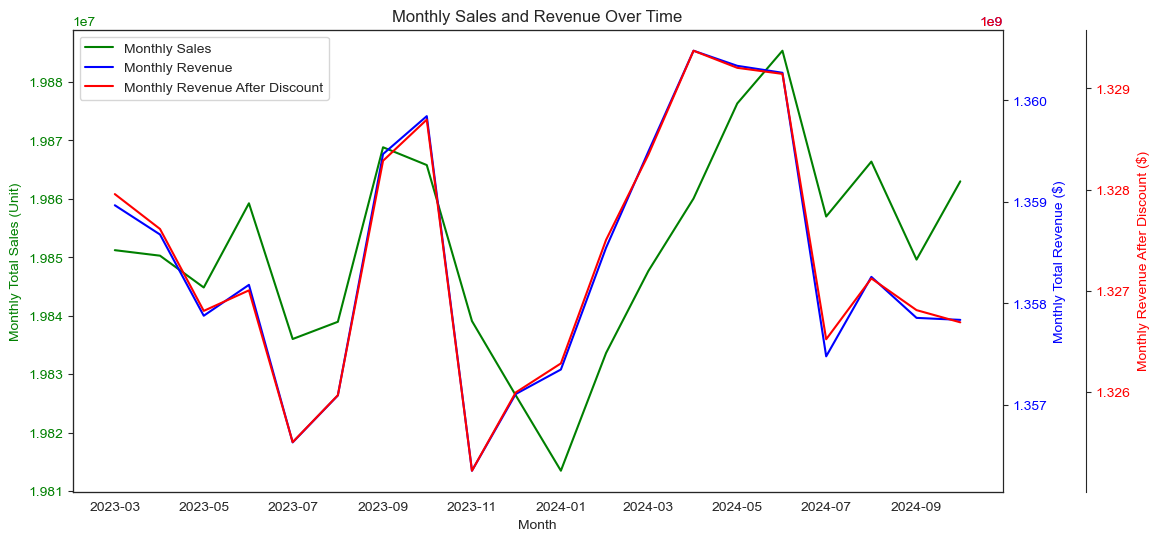

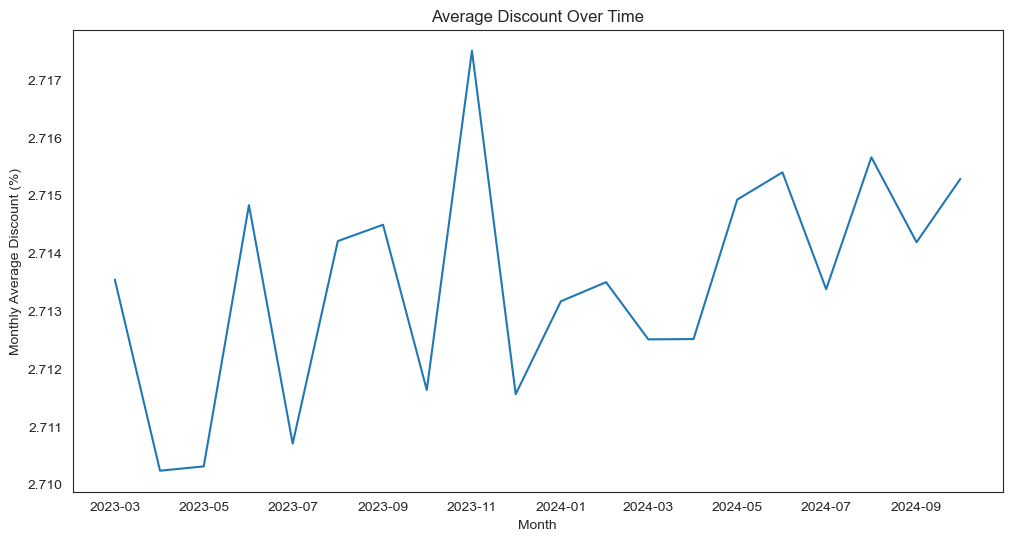

In [ ]:
# Calculating monthly total sales, revenue, and revenue after discount
monthly_sales = df.groupby('Month')['Monthly Sales'].sum()
monthly_revenue = df.groupby('Month')['Monthly Revenue'].sum()
monthly_revenue_after_discount = df.groupby('Month')['Monthly Revenue after Discount'].sum()

# Creating a figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis (left) for monthly total sales
ax1.plot(monthly_sales.index, monthly_sales.values, 'g-', label='Monthly Sales')  # Green line for sales
ax1.set_xlabel('Month')
ax1.set_ylabel('Monthly Total Sales (Unit)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Secondary y-axis (right) for monthly total revenue
ax2 = ax1.twinx()  # Share the x-axis with ax1
ax2.plot(monthly_revenue.index, monthly_revenue.values, 'b-', label='Monthly Revenue')  # Blue line for revenue
ax2.set_ylabel('Monthly Total Revenue ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# "Third" y-axis (simulated) for revenue after discount
ax3 = ax1.twinx()  # Share the x-axis with ax1 and ax2
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis spine
ax3.plot(monthly_revenue_after_discount.index, monthly_revenue_after_discount.values, 'r-', label='Monthly Revenue After Discount')  # Red line for revenue after discount
ax3.set_ylabel('Monthly Revenue After Discount ($)', color='red')
ax3.tick_params(axis='y', labelcolor='red')


plt.title('Monthly Sales and Revenue Over Time')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')
plt.xticks(rotation=45)
plt.show()


# Calculating monthly average discount
monthly_avg_discount = df.groupby('Month')['Discount %'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_discount.index, monthly_avg_discount.values)
plt.xlabel('Month')
plt.ylabel('Monthly Average Discount (%)')
plt.title('Average Discount Over Time')
plt.show()

- All three lines (Monthly Sales, Monthly Revenue, and Monthly Revenue After Discount) show a fluctuating pattern over the given timeframe, with peaks and troughs. However, the fluctuation across all three parameters is within a small range.
- Both sales and revenue generally show an upward trend over the two years, indicating positive business performance.
- There's a clear seasonal pattern with peaks around the holiday season (November/December) and troughs in the early months of each year. This is common in retail, and understanding this seasonality is crucial for inventory planning and marketing strategies.
- There is occasional divergence between sales and revenue diverge, for example in April 2023, where revenue increases despite a dip in sales. This could be due to factors like changes in product mix or decrease in the average discount offered.
- Mid-2024 demonstrates a period of strong growth in both sales and revenue, suggesting successful business strategies or favorable market conditions.
- The average monthly discount (bottom chart) shows a fluctuating trend, with no clear consistent pattern. However, some peaks in discounts seem to coincide with periods of lower sales or slower revenue growth.

#### 3.2 Sales, Revenue, and Average Discount Trends by Category

In [ ]:
# Creating function
def plot_cat_monthly_sales_revenue(df, category):
  """
  Plots monthly sales, revenue, and revenue after discount for a specific category.
  """

  # Filtering the DataFrame for the specific category
  df_filtered = df[df['Category'] == category]

  # Calculating monthly total sales and revenue for the filtered DataFrame
  monthly_total_sales = df_filtered.groupby('Month')['Monthly Sales'].sum()
  monthly_total_revenue = df_filtered.groupby('Month')['Monthly Revenue'].sum()
  total_revenue_after_discount = df_filtered.groupby('Month')['Monthly Revenue after Discount'].sum()

  # Creating a figure with dual y-axis
  fig, ax1 = plt.subplots(figsize=(12, 6))

  # Primary y-axis (left) for monthly total sales
  ax1.plot(monthly_total_sales.index, monthly_total_sales.values, 'g-', label='Monthly Sales')
  ax1.set_xlabel('Month')
  ax1.set_ylabel('Monthly Total Sales (Unit)', color='green')
  ax1.tick_params(axis='y', labelcolor='green')

  # Secondary y-axis (right) for monthly total revenue
  ax2 = ax1.twinx()
  ax2.plot(monthly_total_revenue.index, monthly_total_revenue.values, 'b-', label='Monthly Revenue')
  ax2.set_ylabel('Monthly Total Revenue ($)', color='blue')
  ax2.tick_params(axis='y', labelcolor='blue')

  # "Third" y-axis (simulated) for revenue after discount
  ax3 = ax1.twinx()
  ax3.spines['right'].set_position(('outward', 60))
  ax3.plot(total_revenue_after_discount.index, total_revenue_after_discount.values, 'r-', label='Monthly Revenue After Discount')
  ax3.set_ylabel('Monthly Revenue After Discount ($)', color='red')
  ax3.tick_params(axis='y', labelcolor='red')


  plt.title(f'Monthly Sales and Revenue Over Time for {category}')
  lines1, labels1 = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  lines3, labels3 = ax3.get_legend_handles_labels()
  plt.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')
  #plt.xticks(rotation=45)
  plt.show()

In [ ]:
def plot_cat_monthly_avg_discount(df, category):
  """
  Plots the monthly average discount for a specific category.
  """

  filtered_df = df[df['Category'] == category]
  monthly_avg_discount = filtered_df.groupby('Month')['Discount %'].mean()

  plt.figure(figsize=(12, 6))
  plt.plot(monthly_avg_discount.index, monthly_avg_discount.values)
  plt.xlabel('Month')
  plt.ylabel('Monthly Average Discount (%)')
  plt.title(f'Average Discount Over Time ({category})')
  #plt.xticks(rotation=45)
  plt.show()

#### Category: Electronics

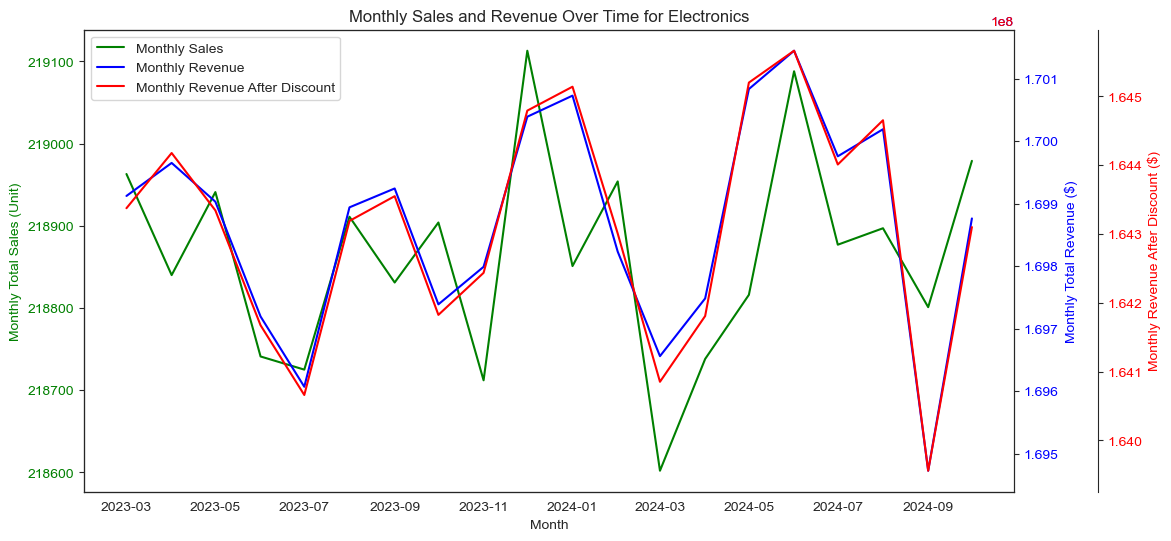

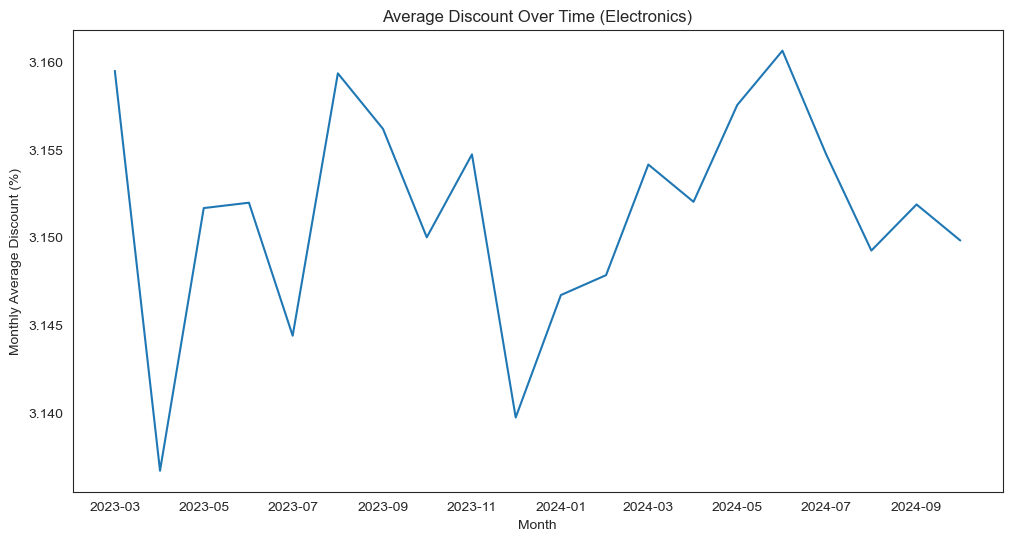

In [ ]:
plot_cat_monthly_sales_revenue(df, 'Electronics')
plot_cat_monthly_avg_discount(df, 'Electronics')

- Despite sales dips in November 2023 and March 2024, revenue kept slowly growing, possibly due to low discount % or higher-priced items, till another dip in September 2024.
- The 2023 holiday season (December 2023) brought the expected surge in sales and revenue, followed by the typical January/February slowdown.

#### Category: Home Goods

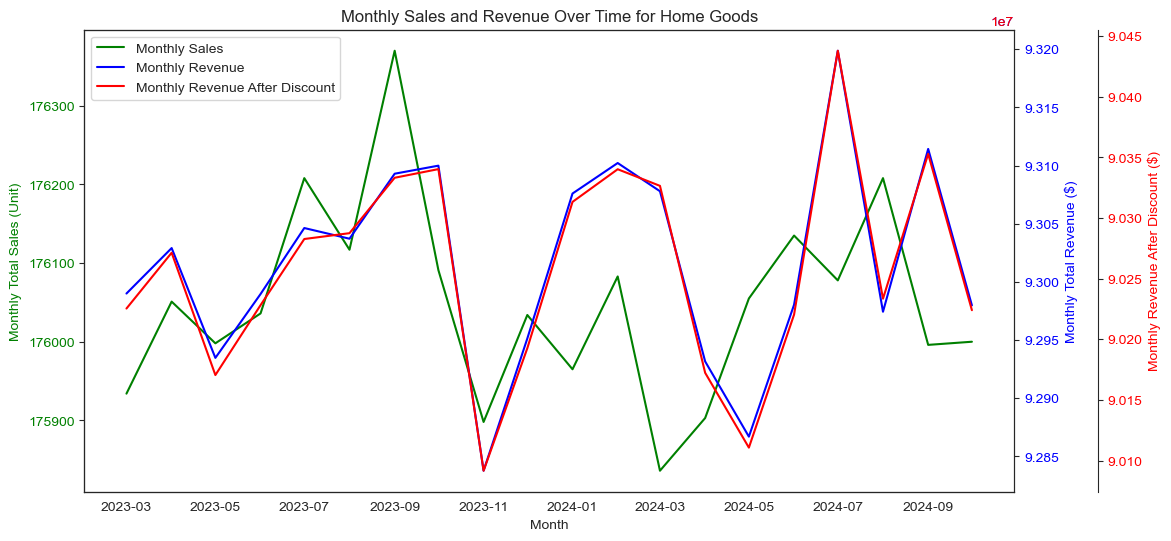

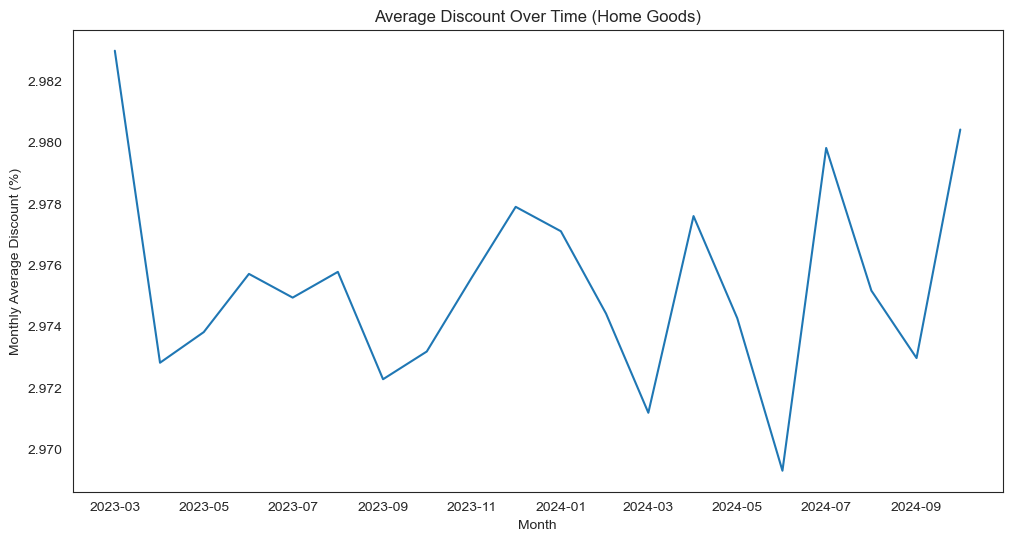

In [ ]:
plot_cat_monthly_sales_revenue(df, 'Home Goods')
plot_cat_monthly_avg_discount(df, 'Home Goods')

- There is a general upward trend in both sales and revenue, indicating positive business performance.
- This category shows strong seasonality with two notable exceptions: a sales spike in September 2023 despite low discounts and a revenue peak in July 2024 despite high discounts.
- Interestingly, the typical holiday season peaks we see in other categories are not as prominent here. This suggests that this category might not be as influenced by holiday shopping trends.

#### Category: Sports

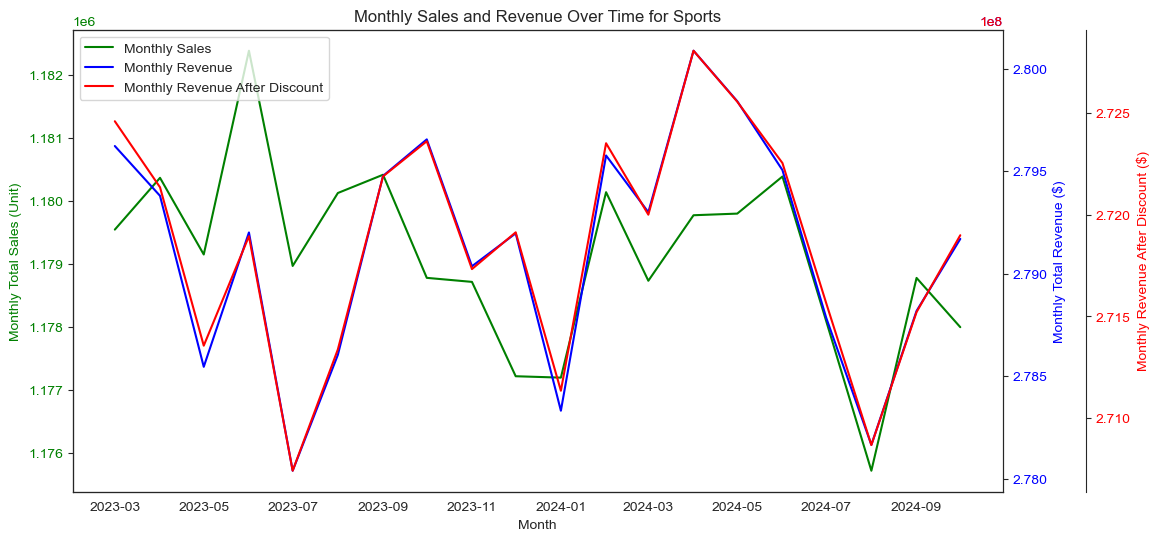

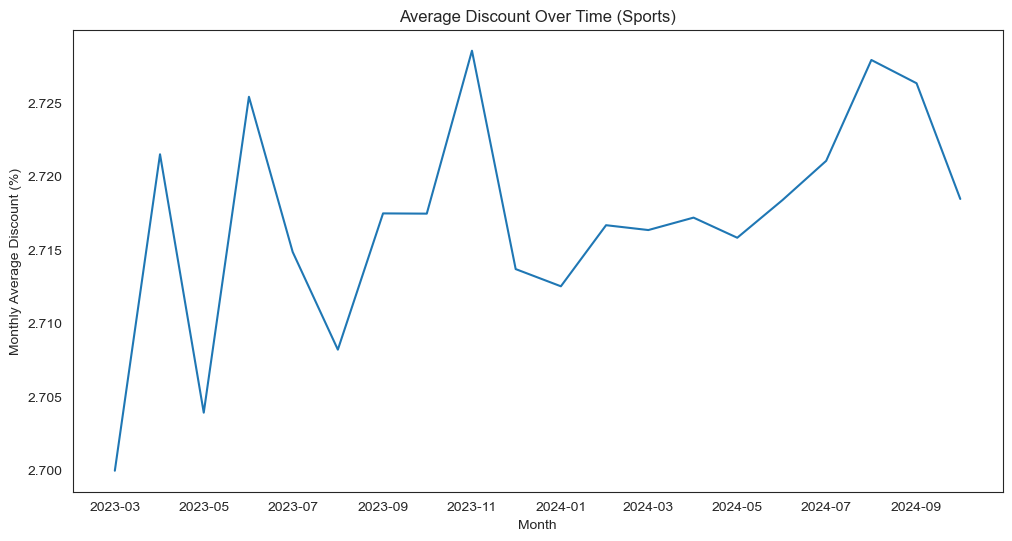

In [ ]:
plot_cat_monthly_sales_revenue(df, 'Sports')
plot_cat_monthly_avg_discount(df, 'Sports')

- Sales and revenue are inconsistent and showed obvious fluctuations throughout the time.
- A more dynamic discounting approach is evident, with discount levels adjusted in response to sales fluctuations.
- Holiday peaks are less pronounced in Sports compared to other categories; however, sales and revenue comparatively increased in summer seasons.

#### Category: Clothing

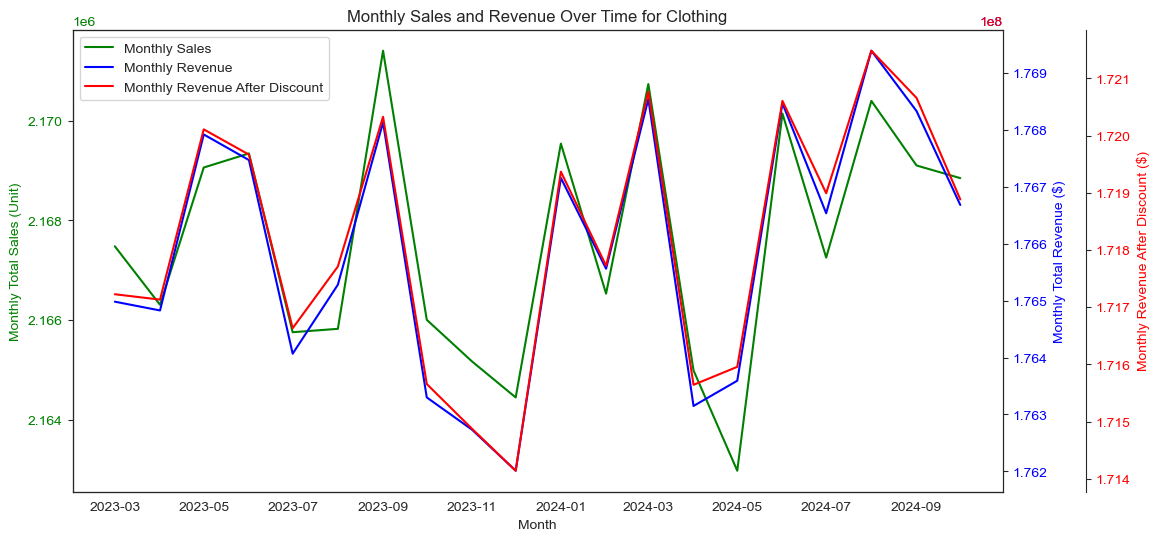

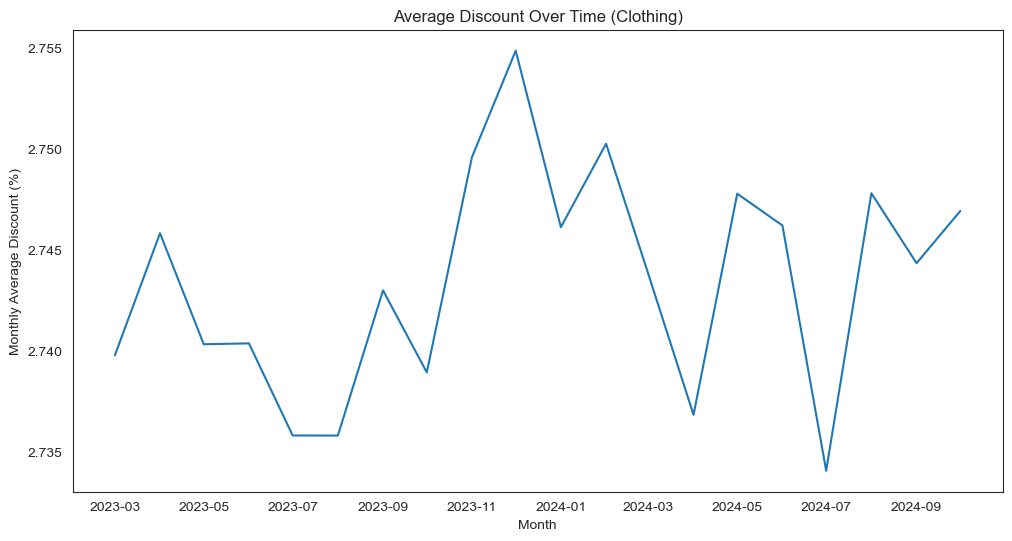

In [ ]:
plot_cat_monthly_sales_revenue(df, 'Clothing')
plot_cat_monthly_avg_discount(df, 'Clothing')

- Sales fluctuate upwardly, with natural peaks aligning with the back-to-school season (September) and after-Christmas sales (January), alongside an overall upward trend in revenue.
- Discounts are used strategically, often coinciding with slower sales periods, suggesting a reactive approach to boost demand.

#### Category: Beauty

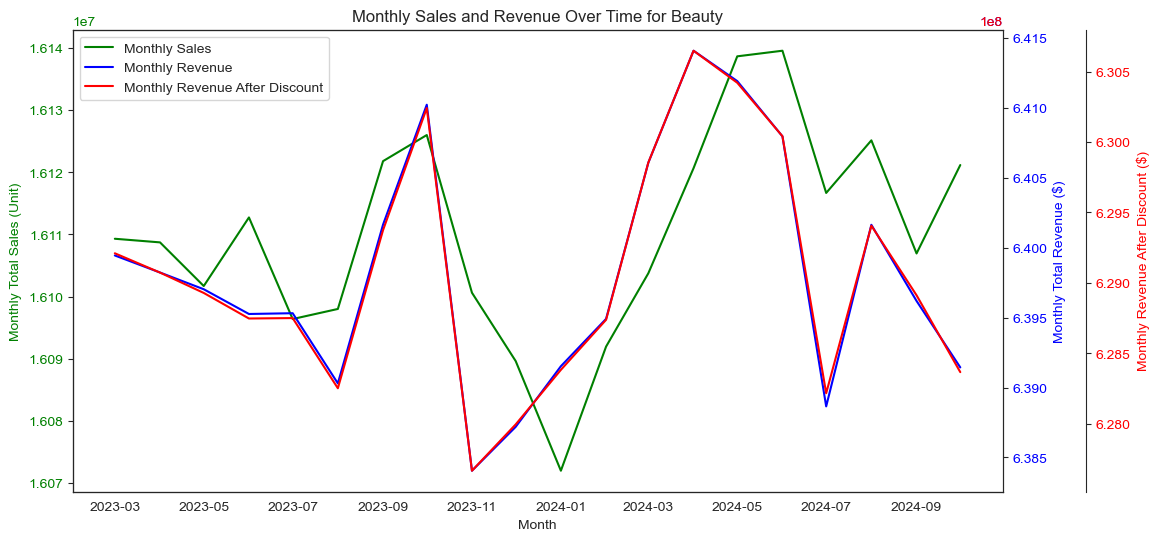

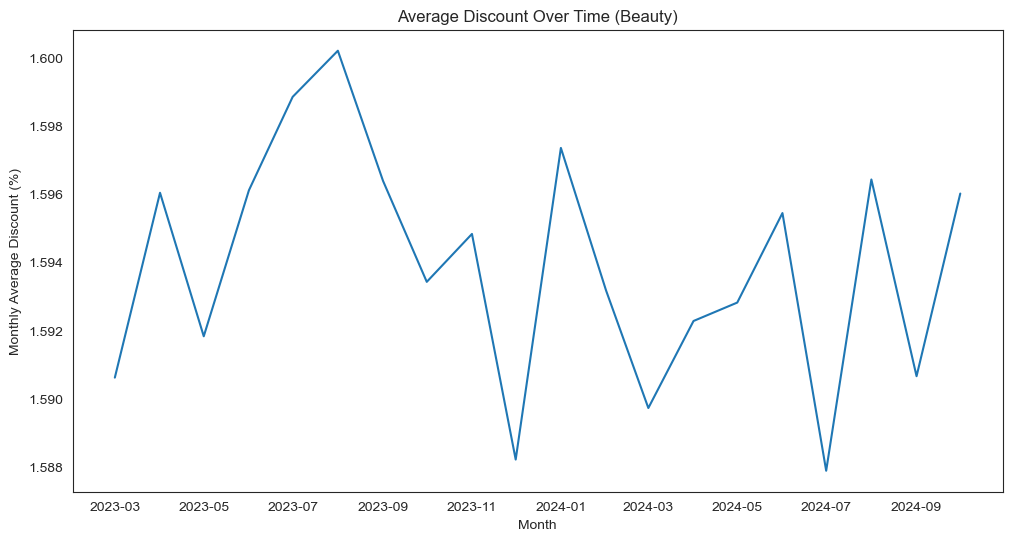

In [ ]:
plot_cat_monthly_sales_revenue(df, 'Beauty')
plot_cat_monthly_avg_discount(df, 'Beauty')

- Strong seasonality is evident, with peaks typically occurring during the holiday season (November/December) and troughs in the early months of each year. This could be due to increased gifting, promotional campaigns, or seasonal product releases.
- A noticeable dip in revenue occurred in Nov 2023 and in sales in Jan 2024, followed by a strong recovery.
- The second quarter of 2024 showed a significant surge in revenue. Further investigation to understand the drivers of this exceptional performance could reveal more insights.

## Key Findings

Category Performance:
- "Beauty" is the top-selling and highest-revenue-generating category, driven by high sales volume and strong customer demand.
- "Electronics" and "Home Goods" have higher average selling prices and contribute significantly to revenue despite lower sales volumes.
- "Sports" shows potential for revenue growth due to its higher average selling price.
- "Clothing" has high sales volume but generates relatively lower revenue, indicating potential for optimization.

Seasonality:
- Most categories experience peaks in sales and revenue during the holiday season (November/December) and dips in the early months of the year.
- "Sports" shows increased sales and revenue during the summer months.
- "Clothing" has peaks aligning with the back-to-school season (September) and after-Christmas sales (January).

Discounts:
- Discounts have a varying impact on different categories.
- "Beauty" is the most sensitive to discounts, while "Home Goods" is the least sensitive.
- Discounts in "Electronics" and "Sports" appear less effective than initially thought.

## Actions

Inventory Management:
- Seasonal Products: Align inventory levels with seasonal trends. Increase stock of popular products in peak seasons (e.g., "Beauty" products during the holidays, "Sports" products in summer) and adjust levels accordingly during slower periods.
- Category-Specific Strategies: Implement category-specific inventory management strategies based on sales velocity and lead times. For example, maintain higher inventory levels for fast-moving "Beauty" products and adjust stock for slower-moving "Electronics" or "Home Goods" items based on demand forecasts.

Marketing Strategies:
- Product-Specific Targeted Promotions: Tailor marketing campaigns to specific categories and seasonal trends. Focus on promoting "Beauty" products during the holidays and "Sports" products in the summer.
Category-Specific Targeted Promotions: Develop category-specific marketing campaigns tailored to the target customers.

Discount Optimization:
- Carefully manage discounts in the "Beauty" category due to its high price sensitivity. Consider smaller, more targeted discounts or alternative promotional strategies.
- Re-evaluate the discounting strategy for "Electronics" and "Sports" as they appear less sensitive to discounts. Focus on other marketing levers like highlighting product features or brand value.
- Continue the current discounting approach for "Home Goods" as it seems effective.

## Recommendations for Further Analysis

- Analyze product-level trends within each category, and perform product-level demand forecast.
- Conduct detailed price elasticity analysis.
- Analyze discount effectiveness and optimize discount levels.
- Perform machine learning and forecasting models.
- Analyze profit margins by incorporating COGS data.

# Machine Learning Model

This machine learning model aims to forecast monthly sales (the number of units sold) six months in advance. Sales or demand forecasting is essential for effective supply chain management. In this particular case, it will ensure optimal inventory levels and efficient supplier management.

## Facebook Prophet Model

We chose to start with a Facebook Prophet model as it is known for its strength handling seasonality while having limited number of data points (as in our case).

In [ ]:
# Importing libraries
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# Preparing data
df_forecast = df.groupby('Month')['Monthly Sales'].sum().reset_index()

df_forecast['Month'] = pd.to_datetime(df_forecast['Month'], format='%Y-%m')
df_forecast = df_forecast.rename(columns={'Month': 'ds', 'Monthly Sales': 'y'})

20:09:28 - cmdstanpy - INFO - Chain [1] start processing
20:09:28 - cmdstanpy - INFO - Chain [1] done processing


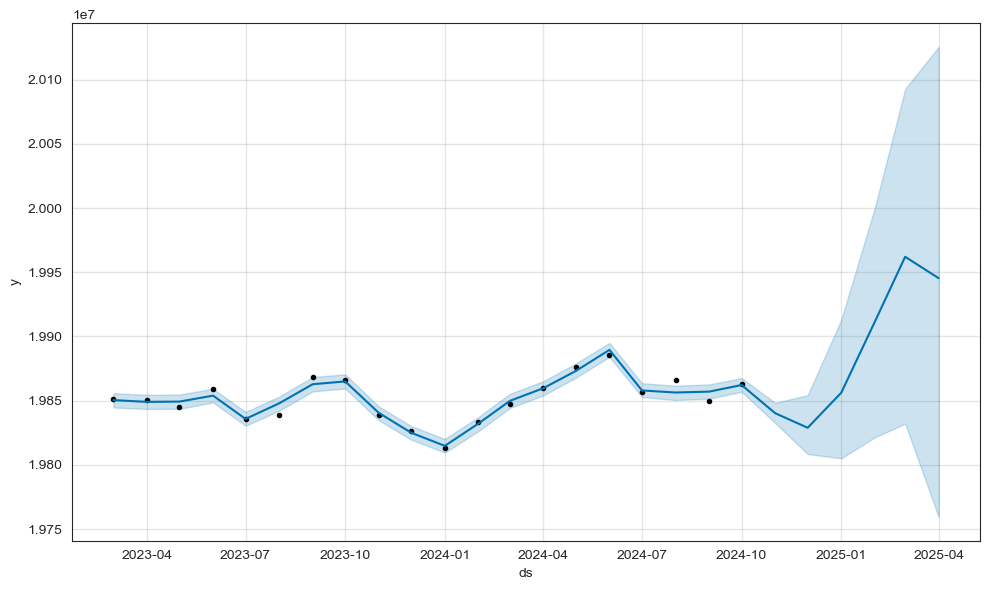

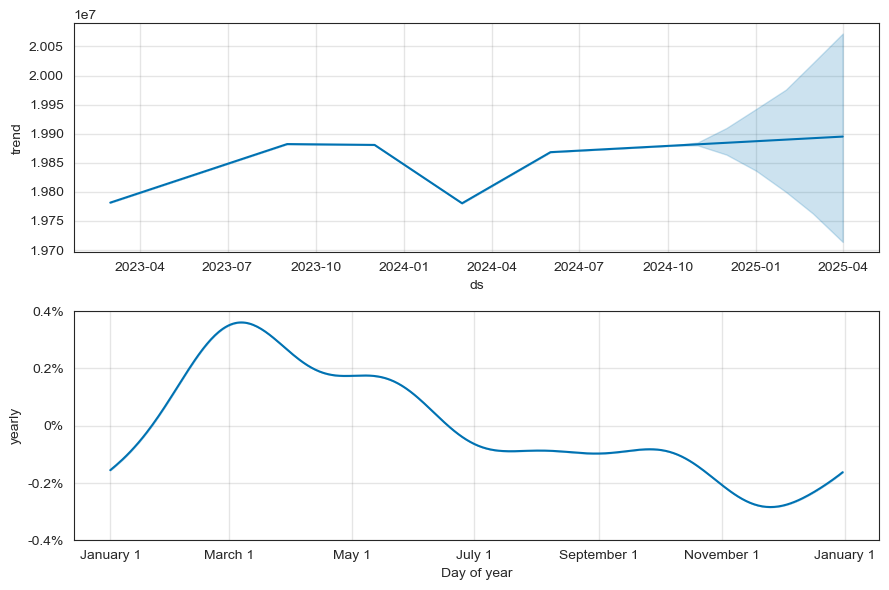

In [ ]:
# Fitting the model
model = Prophet(
    yearly_seasonality=5,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=5,
    changepoint_prior_scale=0.05,
    seasonality_mode='multiplicative'
)

model.fit(df_forecast)

# Creating a future dataframe for 6 months
future = model.make_future_dataframe(periods=6, freq='MS')

# Making predictions
forecast = model.predict(future)

# Plotting
fig = model.plot(forecast)
fig2 = model.plot_components(forecast)
plt.show()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  horizon           mse          rmse           mae      mape     mdape  \
0 27 days  9.552667e+06   3090.738967   3090.738967  0.000155  0.000155   
1 29 days  9.326271e+07   9657.261822   9657.261822  0.000486  0.000486   
2 58 days  3.179438e+06   1783.098004   1783.098004  0.000090  0.000090   
3 60 days  2.006836e+09  44797.720520  44797.720520  0.002257  0.002257   
4 88 days  4.841552e+07   6958.126233   6958.126233  0.000350  0.000350   

      smape  coverage  
0  0.000156       0.0  
1  0.000486       1.0  
2  0.000090       1.0  
3  0.002254       1.0  
4  0.000350       0.0  


20:09:30 - cmdstanpy - INFO - Chain [1] start processing
20:09:30 - cmdstanpy - INFO - Chain [1] start processing
20:09:30 - cmdstanpy - INFO - Chain [1] done processing
20:09:30 - cmdstanpy - INFO - Chain [1] done processing


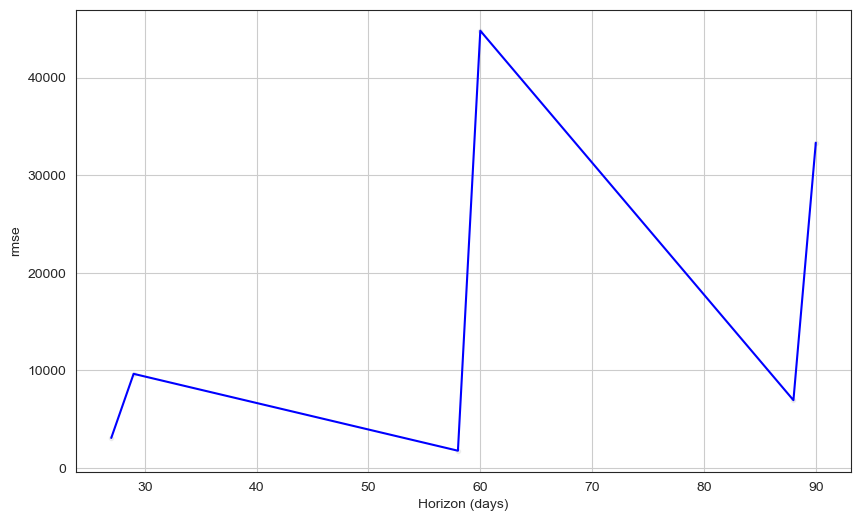

In [ ]:
# Performing cross-validation
df_cv = cross_validation(
    model,
    initial='365 days',  # 1 year initial training data
    period='90 days',     # 3-month spacing between cutoffs
    horizon='90 days',   # 3-month forecast horizon
    parallel="processes"
)

# Calculating performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

# Visualizing performance metrics (e.g., RMSE)
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

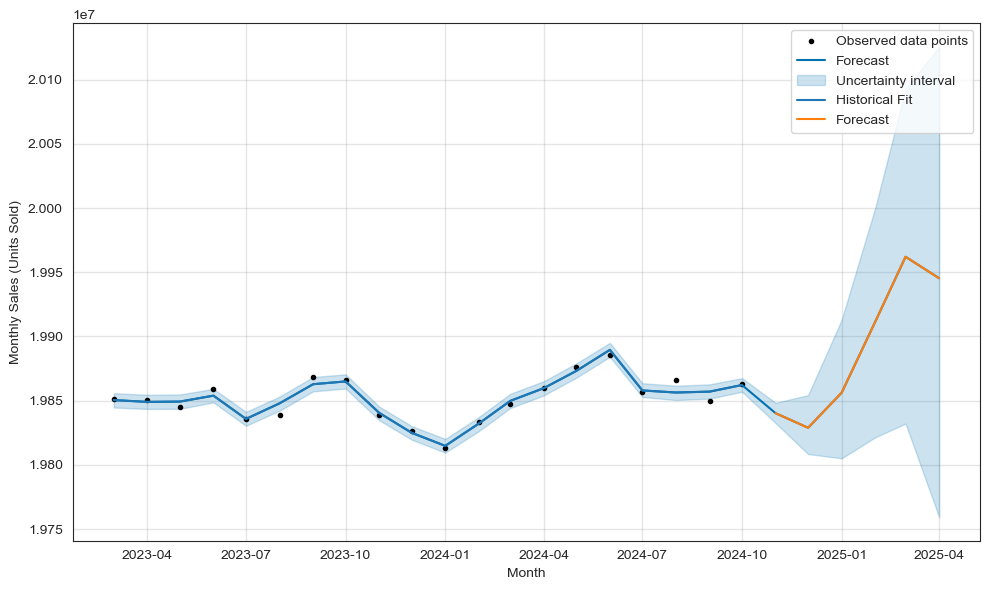

In [ ]:
# Plotting
fig = model.plot(forecast)

# Extracting the historical and forecast data from the 'forecast' DataFrame
historical_data = forecast[forecast['ds'] <= df_forecast['ds'].max()]
forecast_data = forecast[forecast['ds'] > df_forecast['ds'].max()]

# Plotting the historical data on the same figure
plt.plot(historical_data['ds'], historical_data['yhat'], label='Historical Fit')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecast')

plt.xlabel('Month')
plt.ylabel('Monthly Sales (Units Sold)')
plt.legend()
plt.show()

Insights:

- The model shows a clear upward trend in sales data, suggesting that sales are anticipated to increase over the next six months.
- As the trend is not linear, it indicates that the rate of growth would be varying over that time period.
- The confidence interval grows wider as you go further, indicating the increasing inaccuracy or uncertainty of predictions over longer horizons.
- There is a possible yearly seasonality, not strongly evident due to the limited data, however, the forecast indicates a potential yearly seasonality with a peak towards the end of the year and a dip in the beginning.

## Linear Regression with Time Series Features Model

Given the limited number of data points available, we will explore modeling our data using a Linear Regression model with Time Series Features. This approach will allow us to compare its performance to the Facebook Prophet model, which might be challenged by the limatation of data.

MAE: 14142.540000000596
MAE: 19265.447272727637
MAE: 14721.042162162066
          ds          yhat
0 2024-10-01  1.986272e+07
1 2024-11-01  1.986419e+07
2 2024-12-01  1.986566e+07
3 2025-01-01  1.985959e+07
4 2025-02-01  1.986107e+07
5 2025-03-01  1.986254e+07


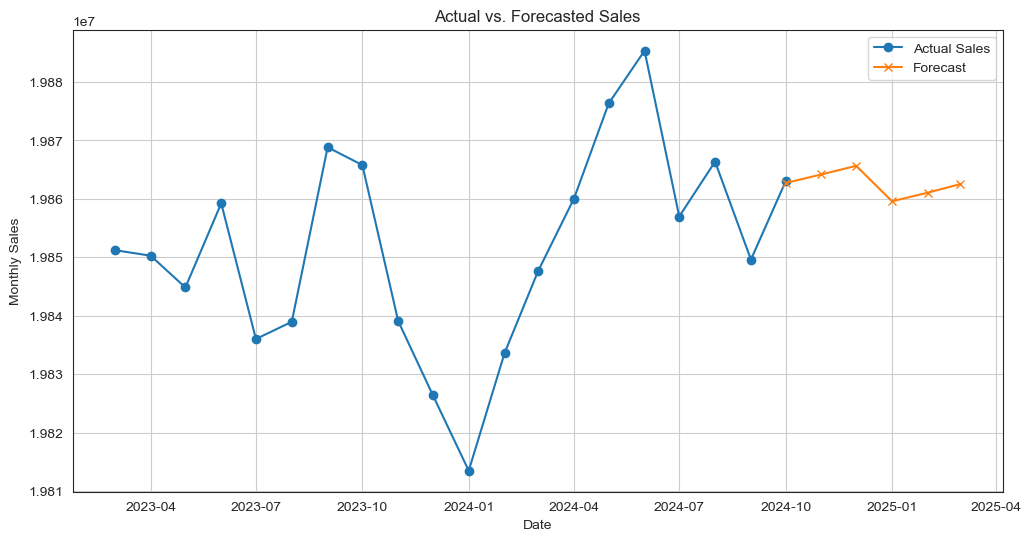

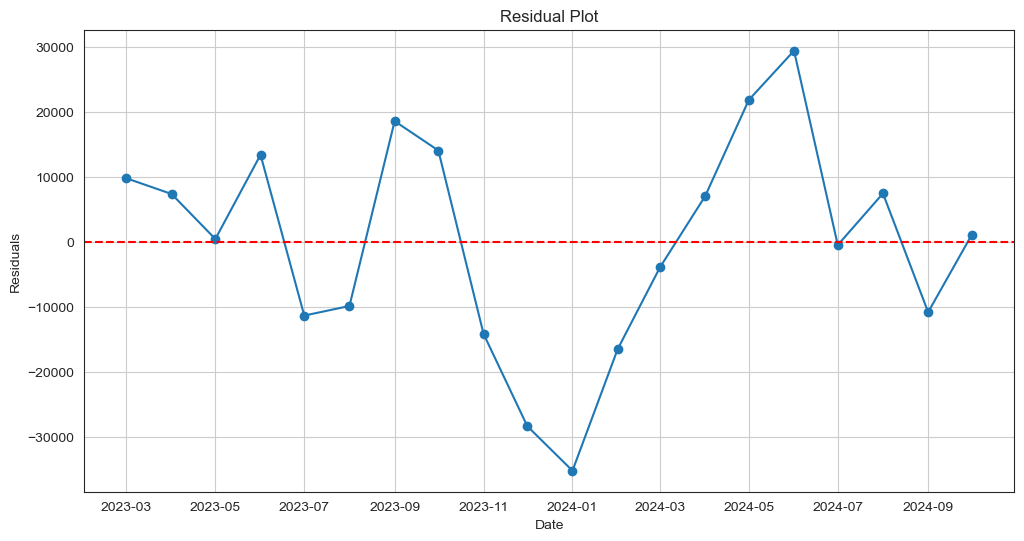

In [ ]:
# Feature engineering
df_forecast['time_index'] = range(1, len(df_forecast) + 1)
df_forecast['month'] = df_forecast['ds'].dt.month

# Splitting data using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(df_forecast):
    # Select features (including the new seasonality features)
    X_train = df_forecast.drop(['y', 'ds'], axis=1).iloc[train_index]
    X_test = df_forecast.drop(['y', 'ds'], axis=1).iloc[test_index]
    y_train, y_test = df_forecast['y'].iloc[train_index], df_forecast['y'].iloc[test_index]


    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions and evaluate
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f"MAE: {mae}")

# Training the final model on the full dataset (including seasonality features)
X = df_forecast.drop(['y', 'ds'], axis=1)
y = df_forecast['y']

# Generating future dataframe for predictions (6 months ahead)
future = pd.DataFrame({'ds': pd.date_range(start=df_forecast['ds'].iloc[-1], periods=6, freq='MS')})
future['time_index'] = range(len(df_forecast) + 1, len(df_forecast) + 7)
future['month'] = future['ds'].dt.month

# Making predictions on the future dataframe
forecast = final_model.predict(future[['time_index', 'month']])

# Creating a dataframe for the forecast results
forecast_df = pd.DataFrame({'ds': future['ds'], 'yhat': forecast})

# Printing and visualizing the forecast_df
print(forecast_df)

# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_forecast['ds'], df_forecast['y'], label='Actual Sales', marker='o')
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Actual vs. Forecasted Sales')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the residuals (errors)
residuals = df_forecast['y'] - final_model.predict(df_forecast[['time_index', 'month']])
plt.figure(figsize=(12, 6))
plt.plot(df_forecast['ds'], residuals, marker='o')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at 0
plt.grid(True)
plt.show()

Insights:
- The model shows the overall upward trend in sales but unlike the Facebook Prophet model, it did not precisely predict the peaks and dips.
- While it predicted a relatively continuous growth, it did not capture the yearly seasonality, as it appeared to be more of a linear extrapolation. This might be due to the nature of Linear Regression models that they tend to assume a linear relationship between variables.

Conclusion:
- Based on the residual plots, the Prophet model seems to have better accuracy and a more random distribution of errors compared to the linear regression model. This suggests that Prophet might be capturing the underlying patterns in the data more effectively.
- The Prophet model likely handles seasonality and trend changes more flexibly due to its built-in components for these patterns compared to the Linear Regression model.
- More data is needed to build a more accurate model and to be able to integrate training and testing splitting, especially if there are strong seasonal patterns or trend changes.